#    ML House Pricing Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("C:/Users/Nikhil Kumar/Desktop/Mani Assignment/House Pricing ML_Project/House Pricing Project/training_set.csv")

In [3]:
df2 = pd.read_csv("C:/Users/Nikhil Kumar/Desktop/Mani Assignment/House Pricing ML_Project/House Pricing Project/testing_set.csv")       

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Null Value Treatment

In [5]:
df1.isna().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

<Axes: >

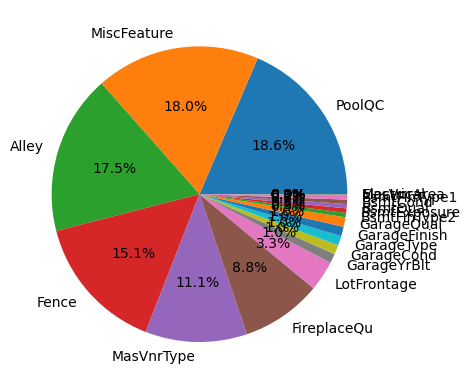

In [6]:
df1.isna().sum().sort_values(ascending=False).plot(kind='pie',autopct='%1.1f%%')

In [7]:
df1= df1.drop('Id',axis=1)

In [8]:
100*df1.isna().sum()/len(df1)

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64

In [9]:
def percent_missing(df):
    percent_nan = 100*df.isna().sum()/len(df)
    percent_nan = percent_nan[percent_nan >0].sort_values()
    
    return percent_nan

In [10]:
percent_nan = percent_missing(df1)

In [11]:
percent_nan

Electrical       0.068493
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageYrBlt      5.547945
GarageType       5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
MasVnrType      59.726027
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

(0.0, 1.0)

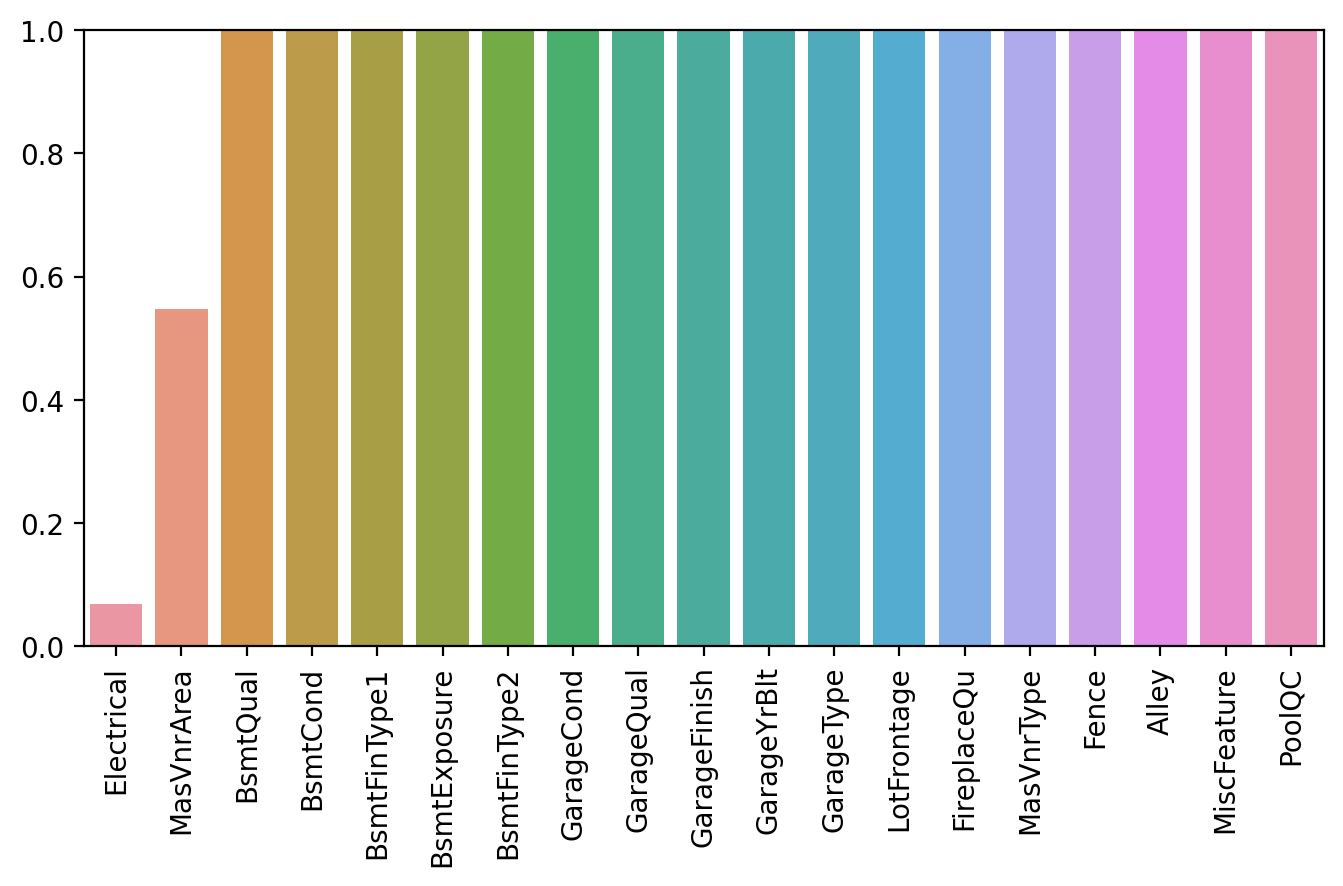

In [12]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [13]:
percent_nan[percent_nan < 1]

Electrical    0.068493
MasVnrArea    0.547945
dtype: float64

In [14]:
100/len(df1)

0.0684931506849315

In [15]:
df1[df1['Electrical'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [16]:
df1 = df1.dropna(axis = 0, subset = ['Electrical'])               

In [17]:
df1['MasVnrType']= df1['MasVnrType'].fillna('None')

In [18]:
df1['MasVnrArea']= df1['MasVnrArea'].fillna(0)

In [19]:
percent_nan = percent_missing(df1)

In [20]:
percent_nan

BsmtQual         2.535984
BsmtCond         2.535984
BsmtFinType1     2.535984
BsmtExposure     2.604524
BsmtFinType2     2.604524
GarageType       5.551748
GarageYrBlt      5.551748
GarageFinish     5.551748
GarageQual       5.551748
GarageCond       5.551748
LotFrontage     17.751885
FireplaceQu     47.224126
Fence           80.740233
Alley           93.762851
MiscFeature     96.298835
PoolQC          99.520219
dtype: float64

In [21]:
cat=[]
con=[]

for i in df1.columns:
    if df1[i].dtypes==object:
        cat.append(i)
    else:
        con.append(i)

In [22]:
print('Cat columns:', cat)
print('Con columns:', con)

Cat columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Con columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckS

In [23]:
bsmt_cat_cols= ['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2']         
df1[bsmt_cat_cols]= df1[bsmt_cat_cols].fillna('None')     
 

In [24]:
percent_nan = percent_missing(df1)

In [25]:
percent_nan

BsmtExposure     2.604524
GarageType       5.551748
GarageYrBlt      5.551748
GarageFinish     5.551748
GarageQual       5.551748
GarageCond       5.551748
LotFrontage     17.751885
FireplaceQu     47.224126
Fence           80.740233
Alley           93.762851
MiscFeature     96.298835
PoolQC          99.520219
dtype: float64

In [26]:
df1['BsmtExposure']= df1['BsmtExposure'].fillna('None')

In [27]:
percent_nan = percent_missing(df1)
percent_nan

GarageType       5.551748
GarageYrBlt      5.551748
GarageFinish     5.551748
GarageQual       5.551748
GarageCond       5.551748
LotFrontage     17.751885
FireplaceQu     47.224126
Fence           80.740233
Alley           93.762851
MiscFeature     96.298835
PoolQC          99.520219
dtype: float64

In [28]:
gar_cat_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df1[gar_cat_cols] = df1[gar_cat_cols].fillna('None')

In [29]:
df1['GarageYrBlt'] = df1['GarageYrBlt'].fillna(0)

In [30]:
percent_nan = percent_missing(df1)
percent_nan

LotFrontage    17.751885
FireplaceQu    47.224126
Fence          80.740233
Alley          93.762851
MiscFeature    96.298835
PoolQC         99.520219
dtype: float64

In [31]:
percent_nan.index

Index(['LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature',
       'PoolQC'],
      dtype='object')

In [32]:
df1= df1.drop(['Fence', 'Alley', 'MiscFeature', 'PoolQC'],axis=1)

In [33]:
percent_nan = percent_missing(df1)
percent_nan

LotFrontage    17.751885
FireplaceQu    47.224126
dtype: float64

In [34]:
df1['FireplaceQu']= df1['FireplaceQu'].fillna('None')

In [35]:
percent_nan = percent_missing(df1)
percent_nan

LotFrontage    17.751885
dtype: float64

In [36]:
df1['LotFrontage']= df1['LotFrontage'].fillna(df1['LotFrontage'].mean())              

In [37]:
percent_nan = percent_missing(df1)
percent_nan

Series([], dtype: float64)

In [38]:
df1.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

### Relation between Input Features and Output Features 

price vs  MSSubClass


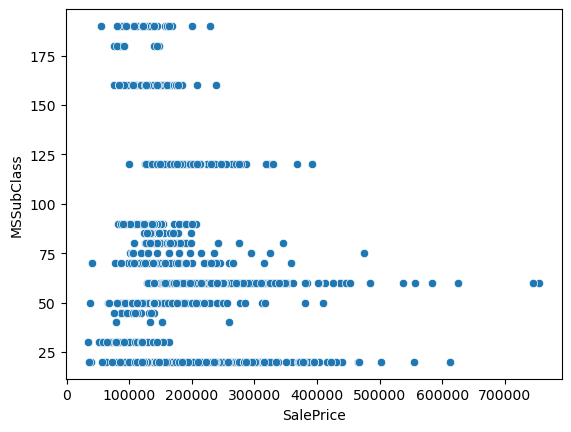

price vs  MSZoning


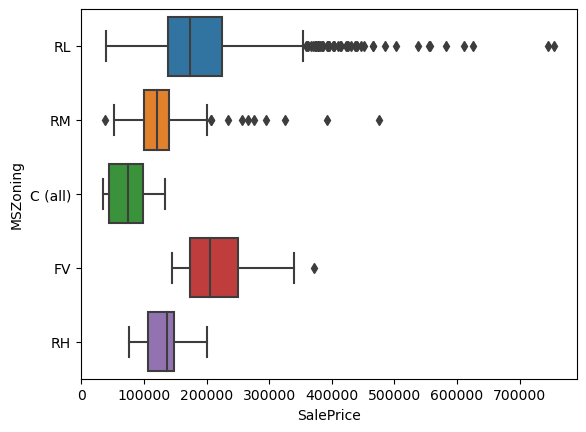

price vs  LotFrontage


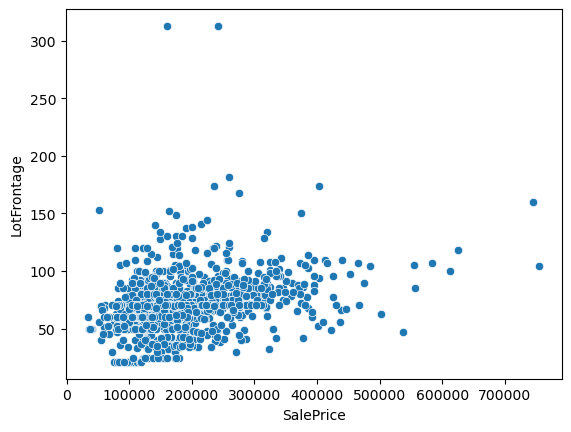

price vs  LotArea


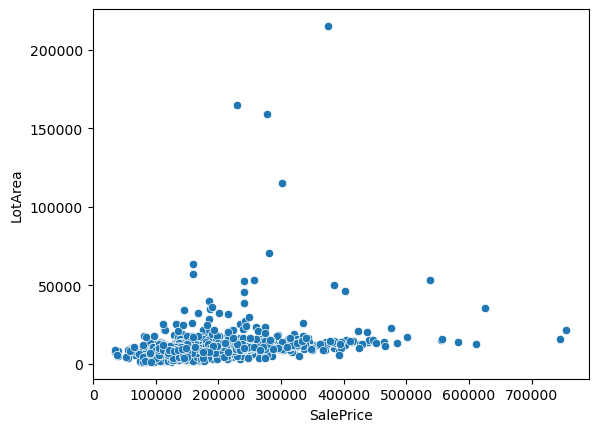

price vs  Street


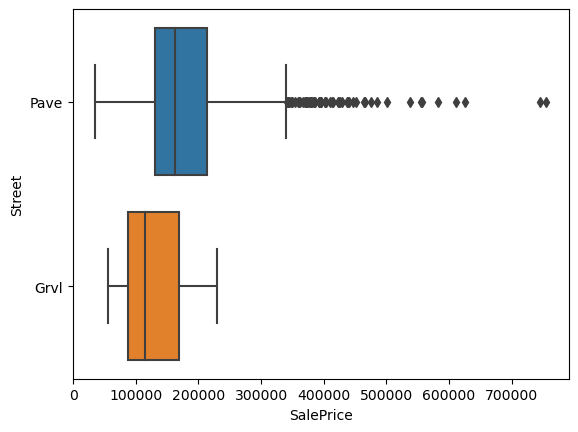

price vs  LotShape


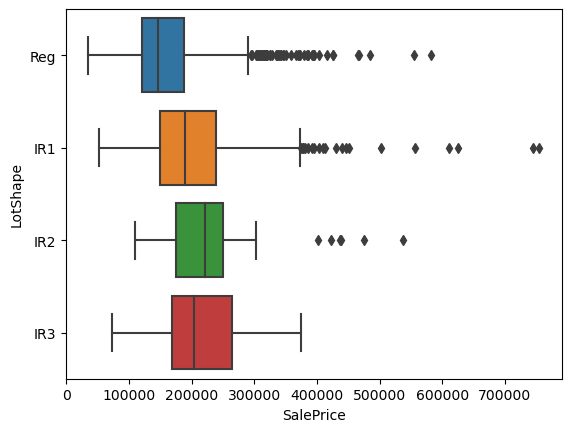

price vs  LandContour


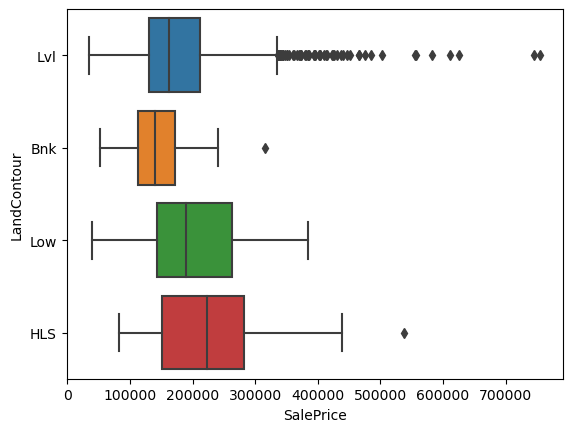

price vs  Utilities


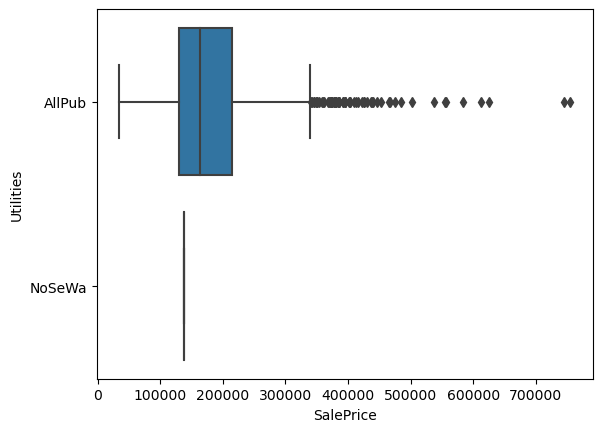

price vs  LotConfig


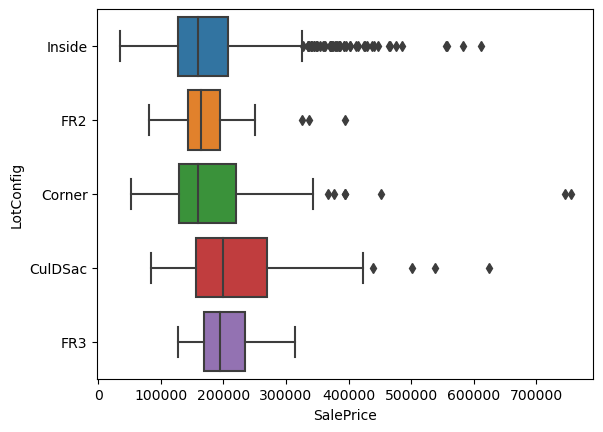

price vs  LandSlope


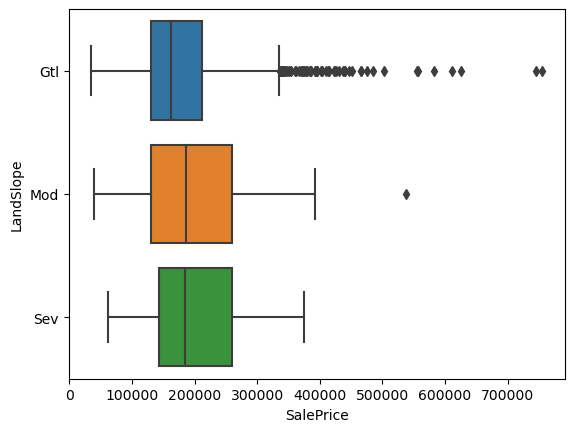

price vs  Neighborhood


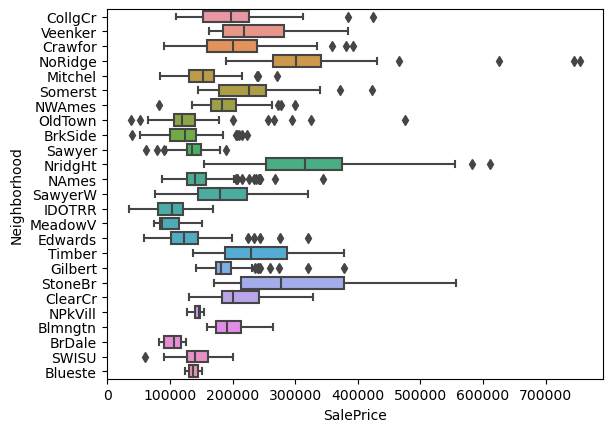

price vs  Condition1


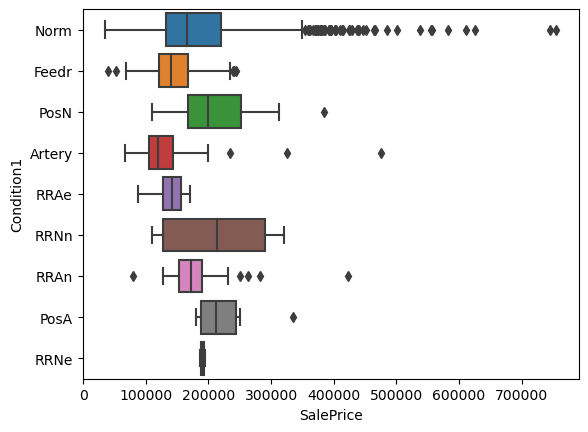

price vs  Condition2


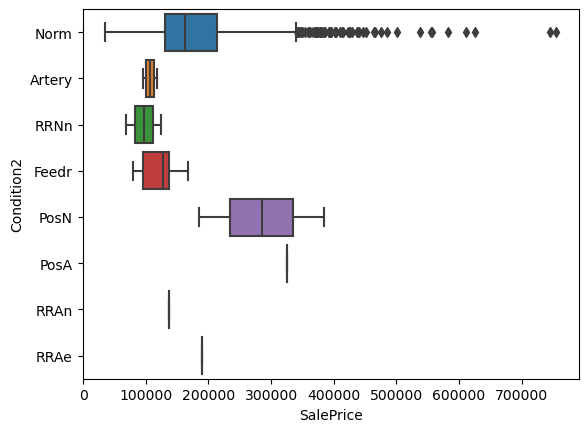

price vs  BldgType


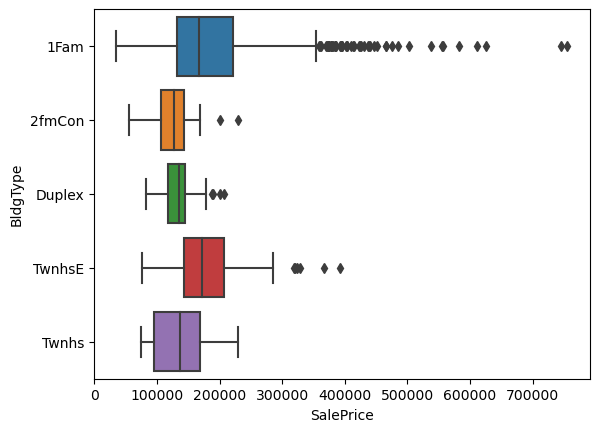

price vs  HouseStyle


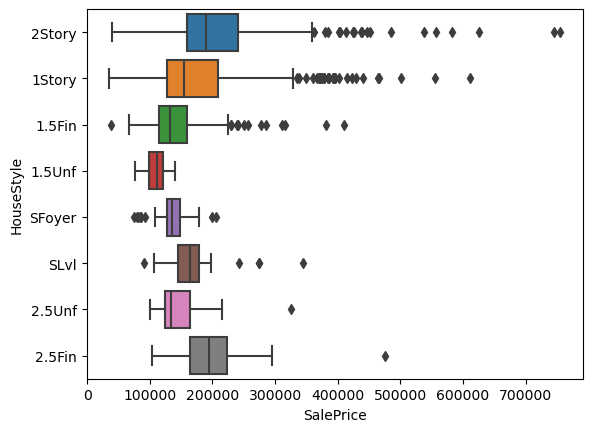

price vs  OverallQual


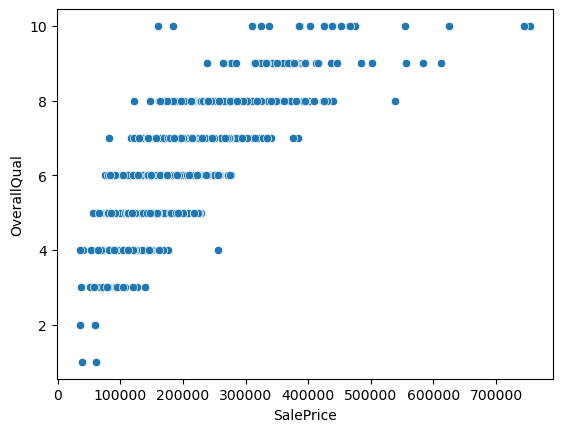

price vs  OverallCond


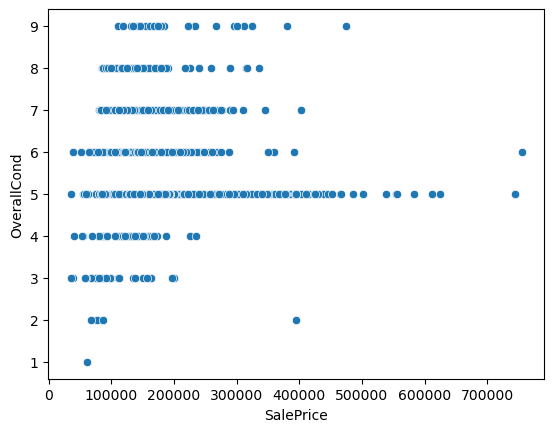

price vs  YearBuilt


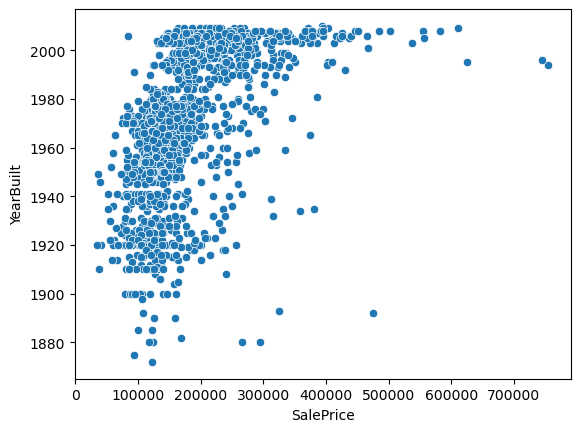

price vs  YearRemodAdd


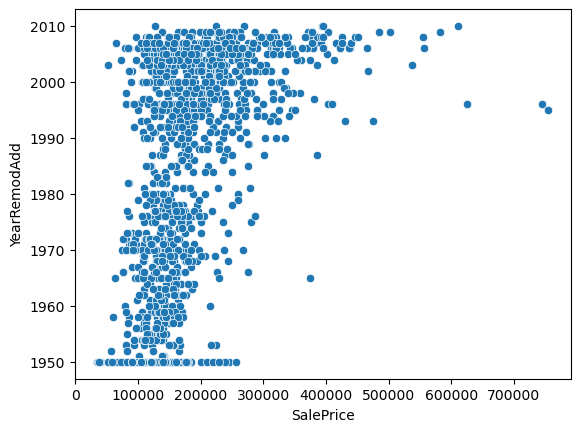

price vs  RoofStyle


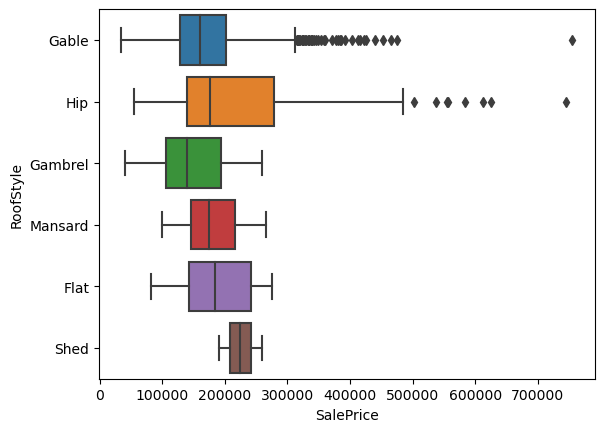

price vs  RoofMatl


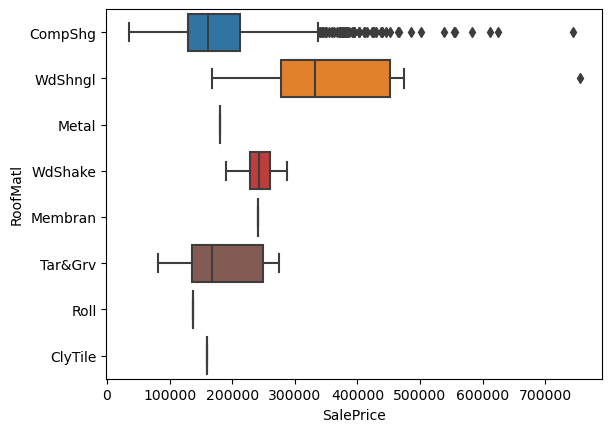

price vs  Exterior1st


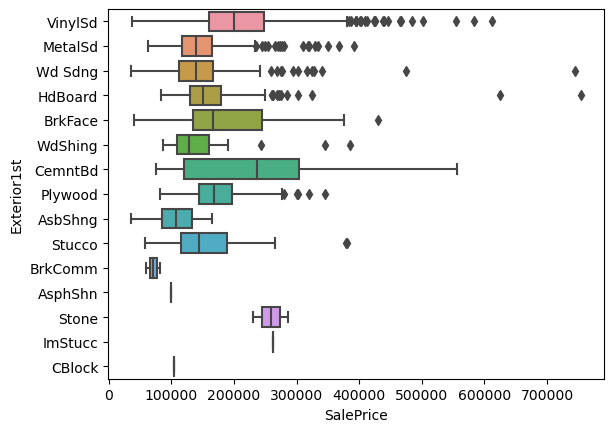

price vs  Exterior2nd


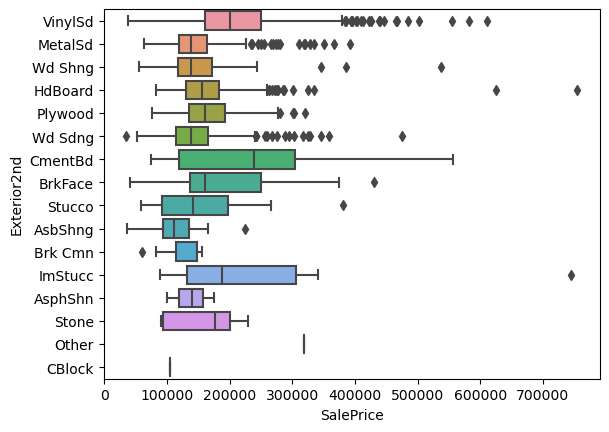

price vs  MasVnrType


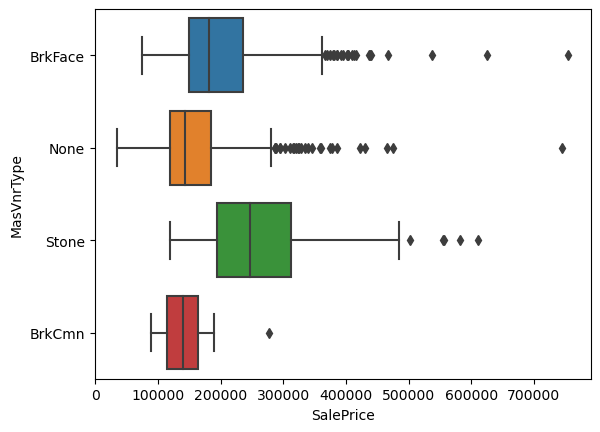

price vs  MasVnrArea


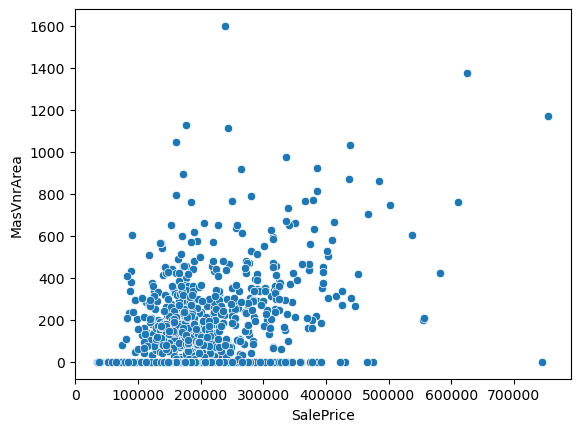

price vs  ExterQual


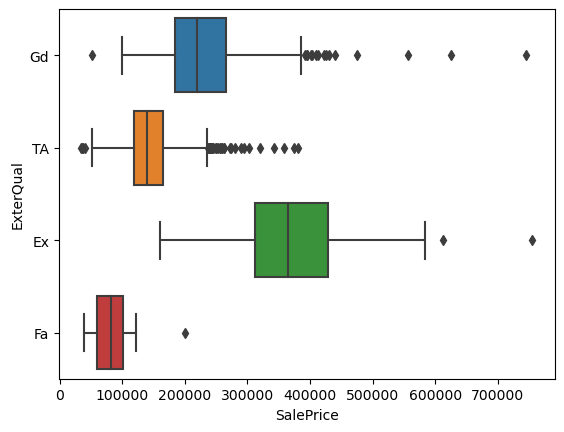

price vs  ExterCond


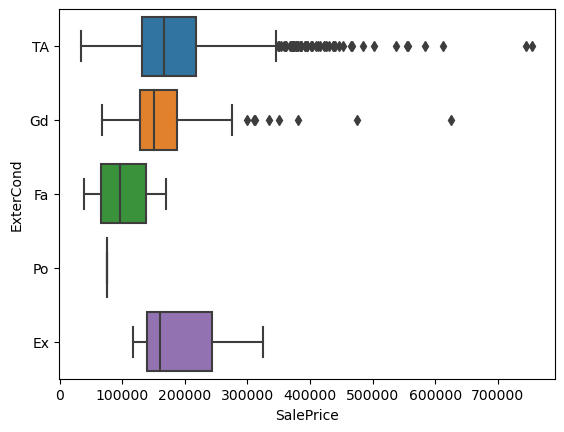

price vs  Foundation


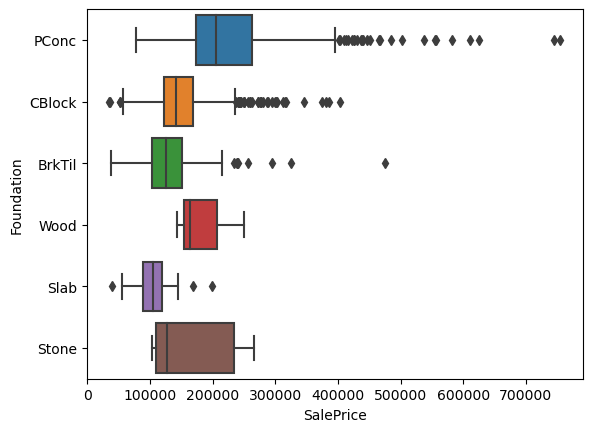

price vs  BsmtQual


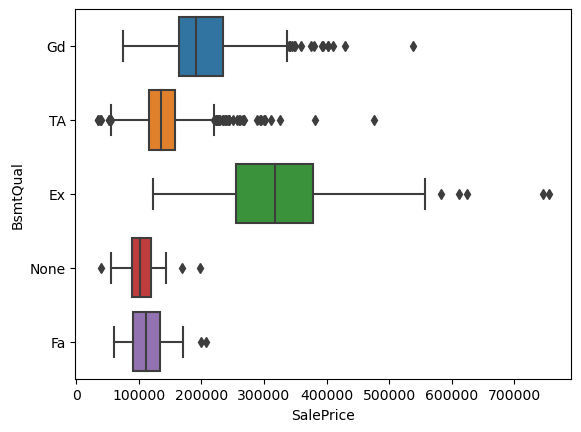

price vs  BsmtCond


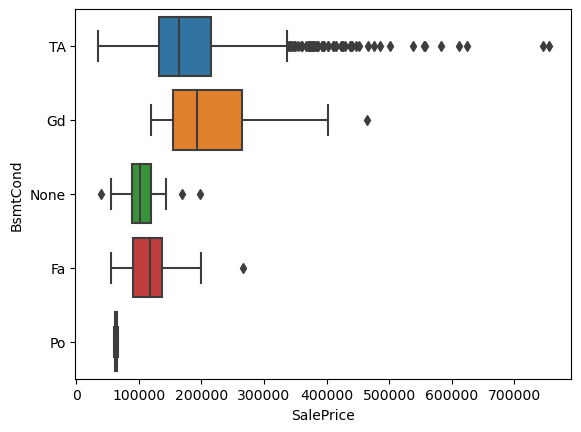

price vs  BsmtExposure


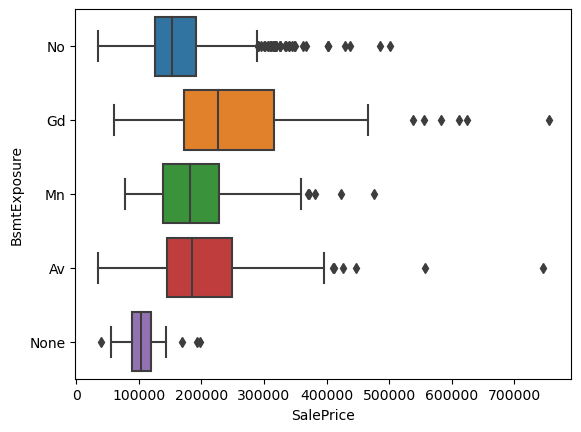

price vs  BsmtFinType1


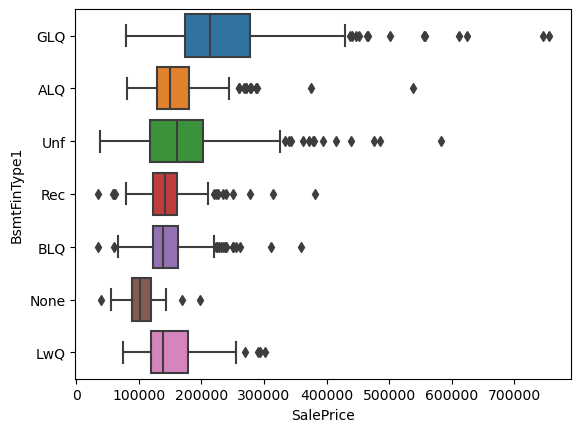

price vs  BsmtFinSF1


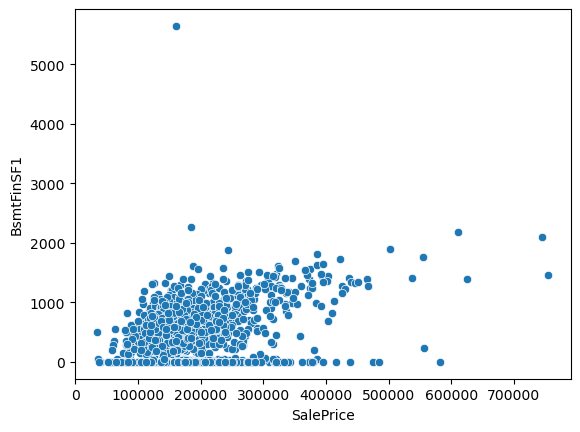

price vs  BsmtFinType2


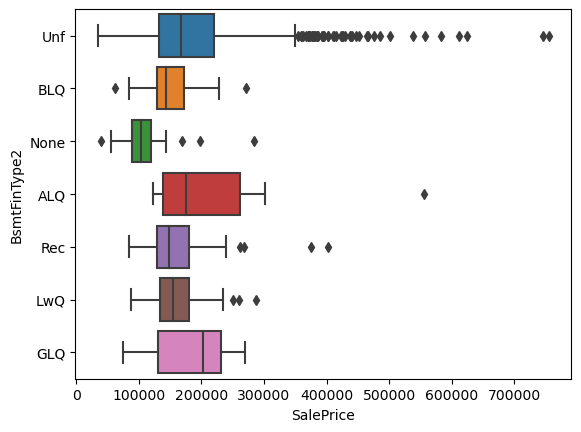

price vs  BsmtFinSF2


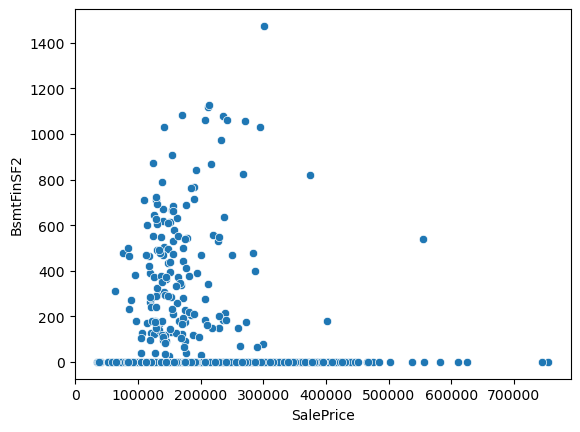

price vs  BsmtUnfSF


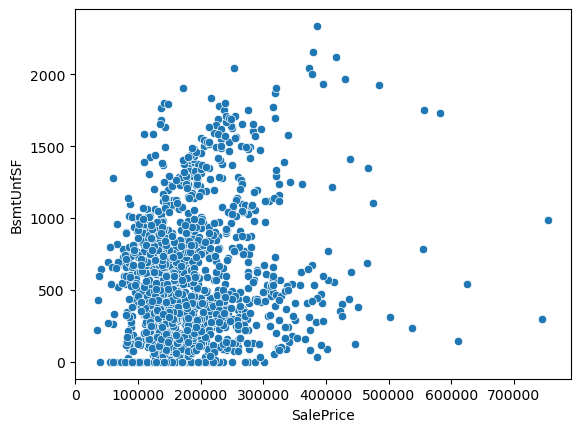

price vs  TotalBsmtSF


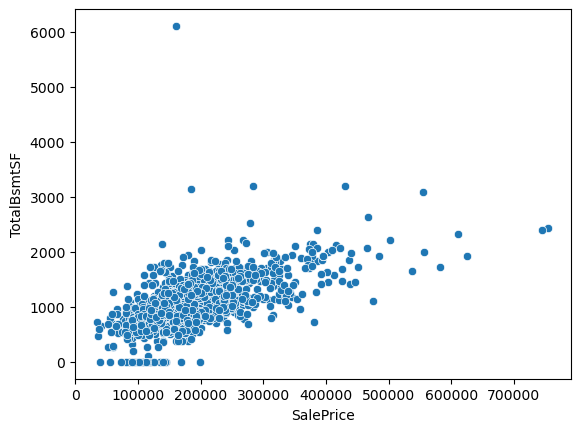

price vs  Heating


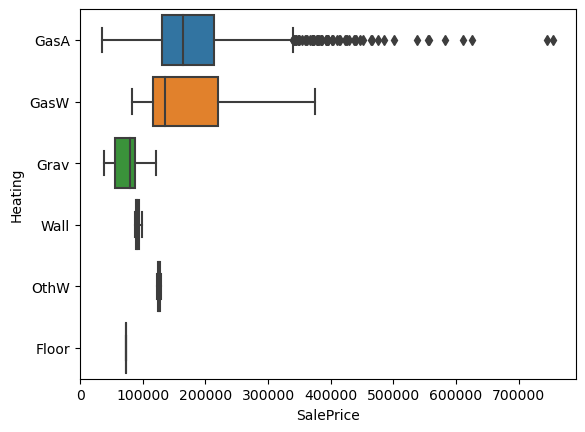

price vs  HeatingQC


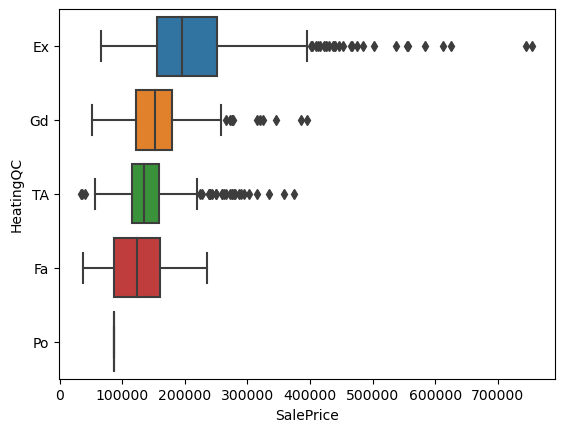

price vs  CentralAir


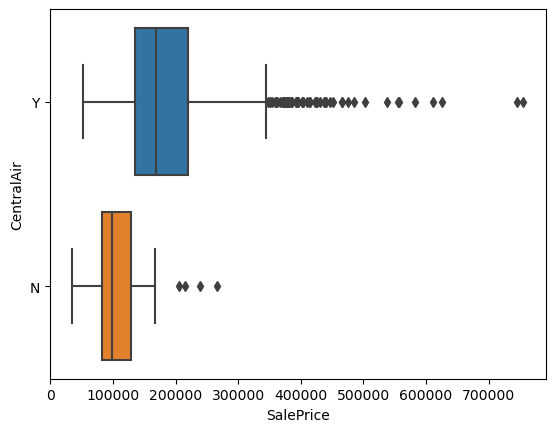

price vs  Electrical


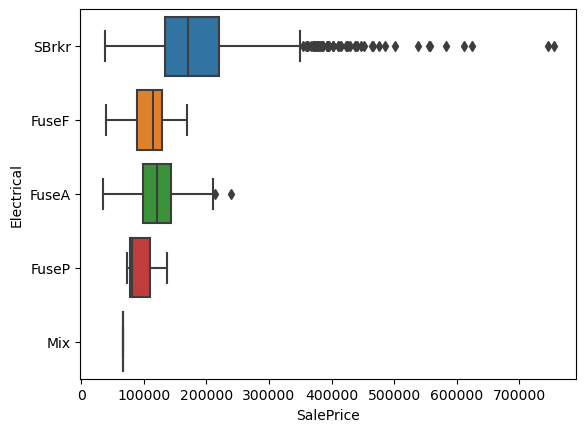

price vs  1stFlrSF


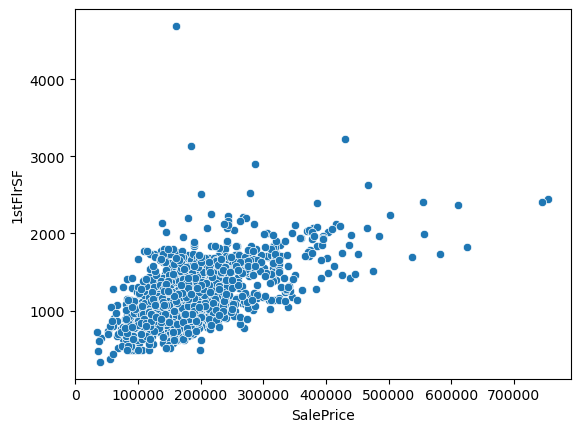

price vs  2ndFlrSF


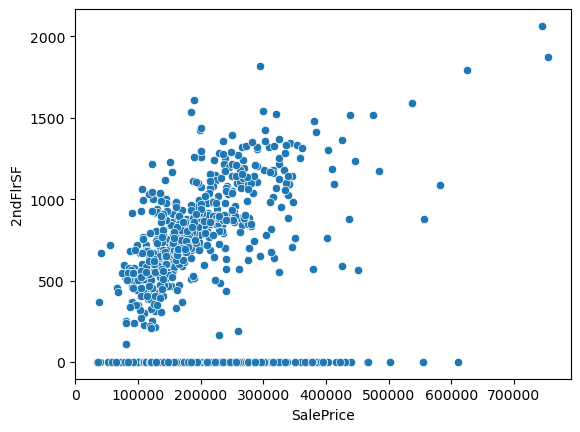

price vs  LowQualFinSF


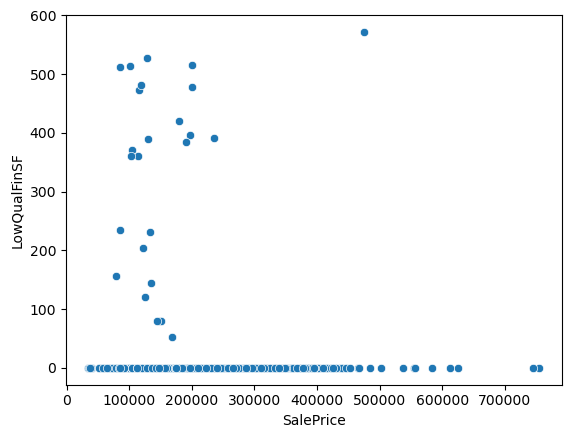

price vs  GrLivArea


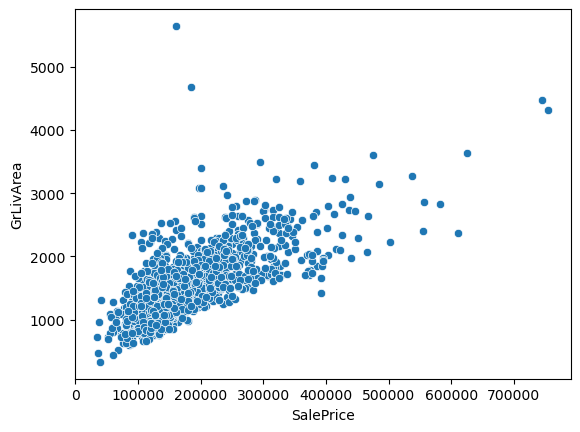

price vs  BsmtFullBath


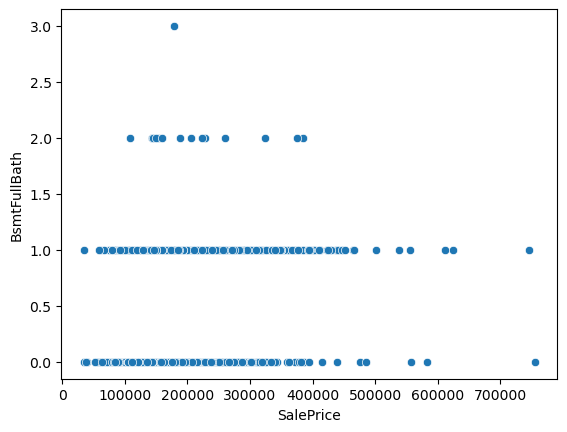

price vs  BsmtHalfBath


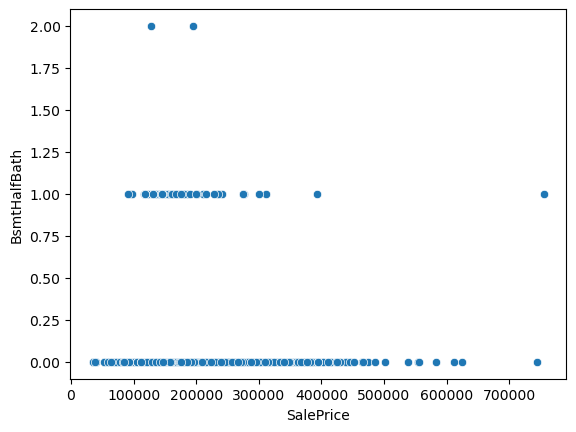

price vs  FullBath


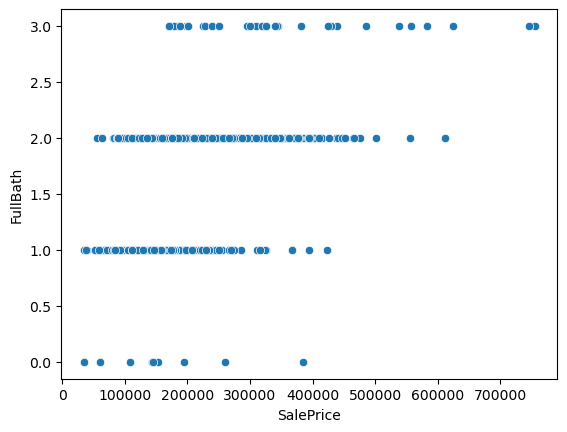

price vs  HalfBath


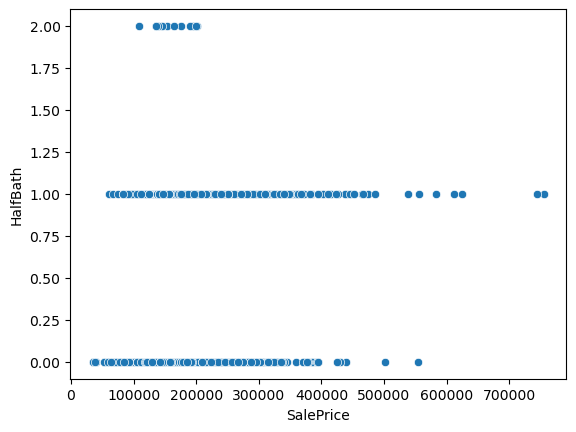

price vs  BedroomAbvGr


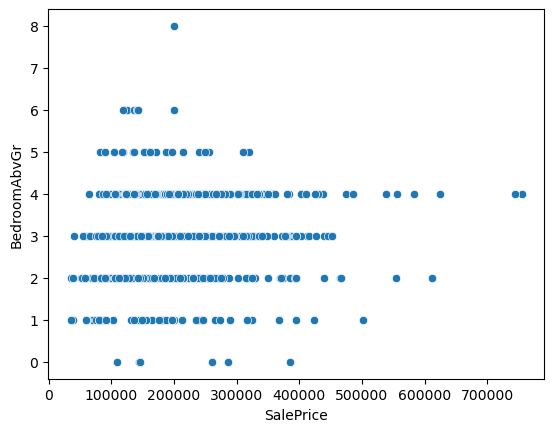

price vs  KitchenAbvGr


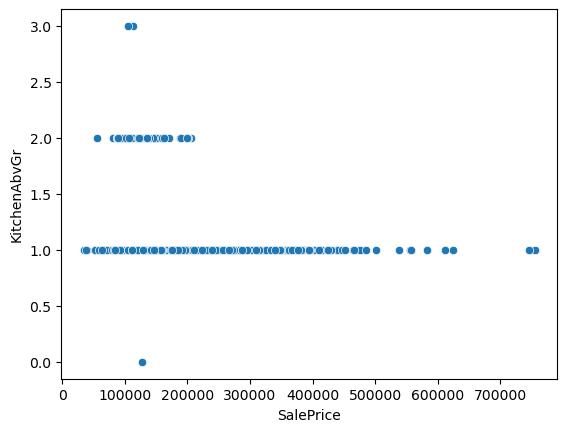

price vs  KitchenQual


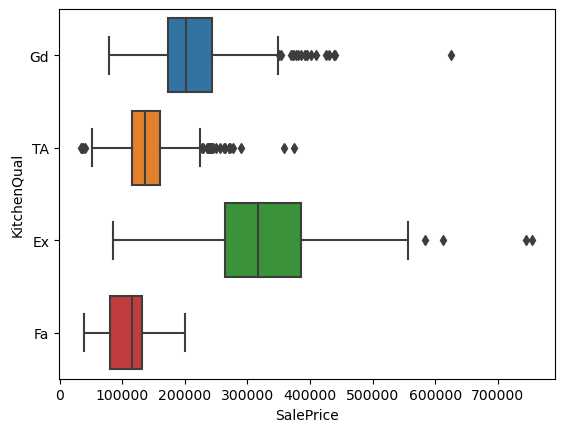

price vs  TotRmsAbvGrd


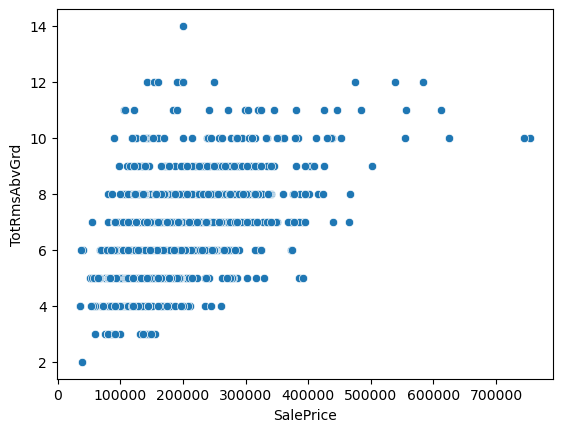

price vs  Functional


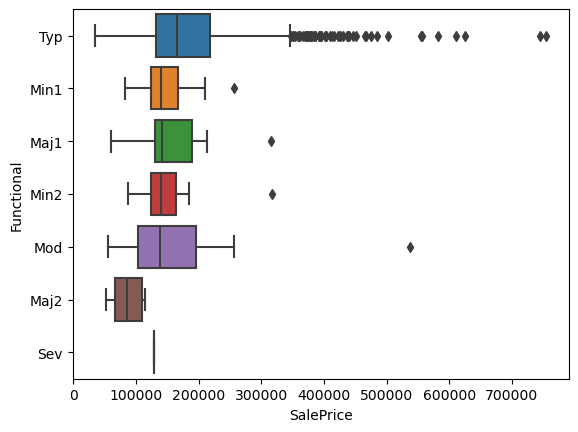

price vs  Fireplaces


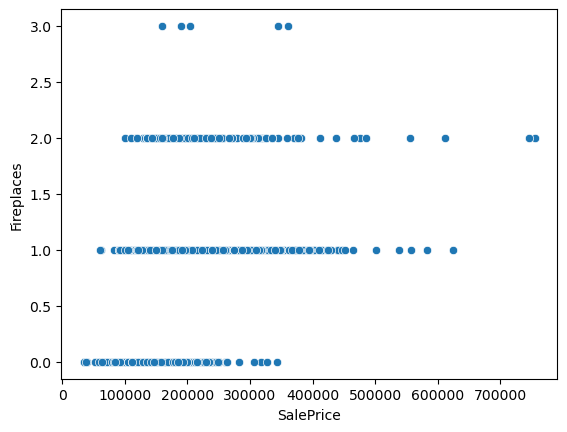

price vs  FireplaceQu


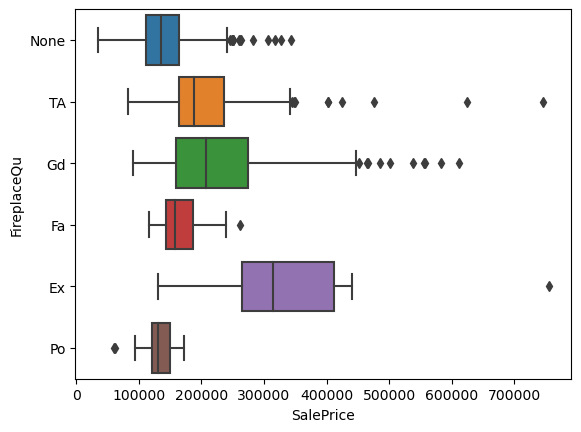

price vs  GarageType


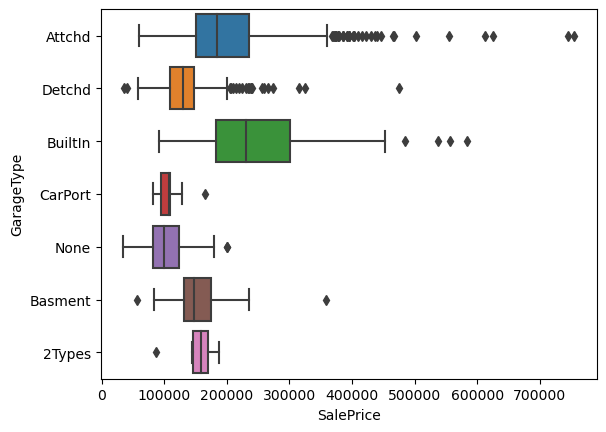

price vs  GarageYrBlt


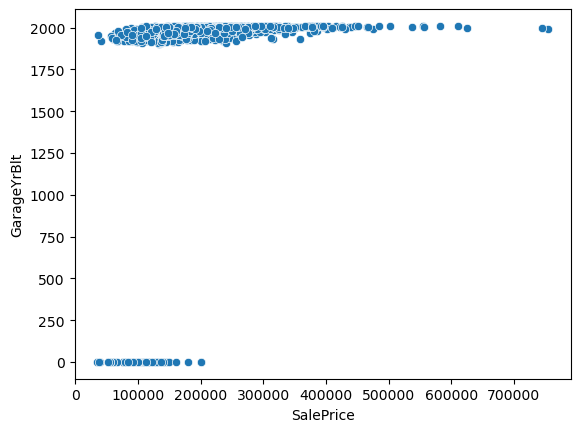

price vs  GarageFinish


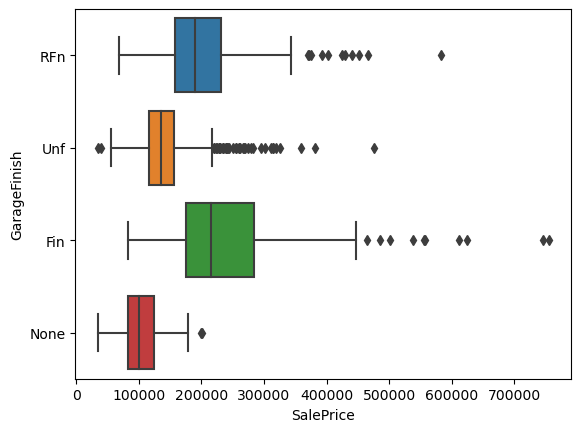

price vs  GarageCars


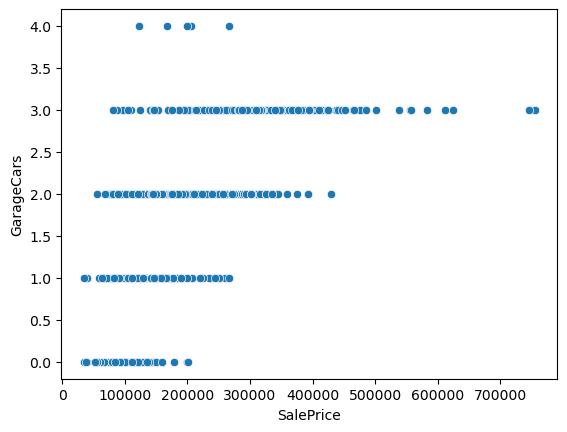

price vs  GarageArea


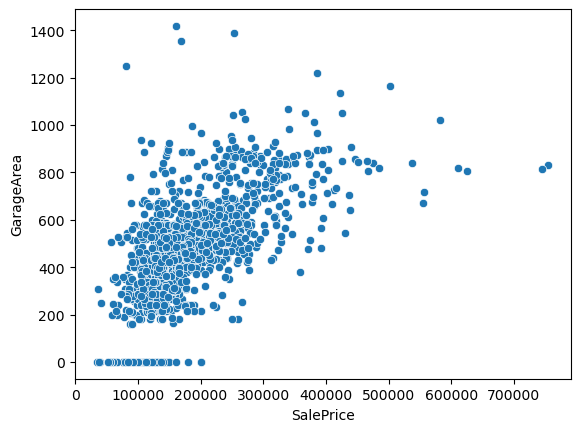

price vs  GarageQual


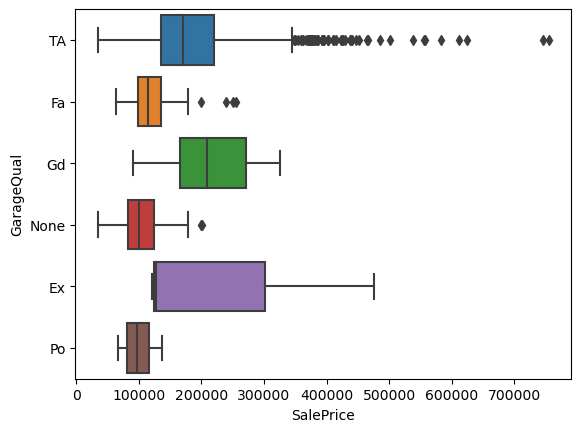

price vs  GarageCond


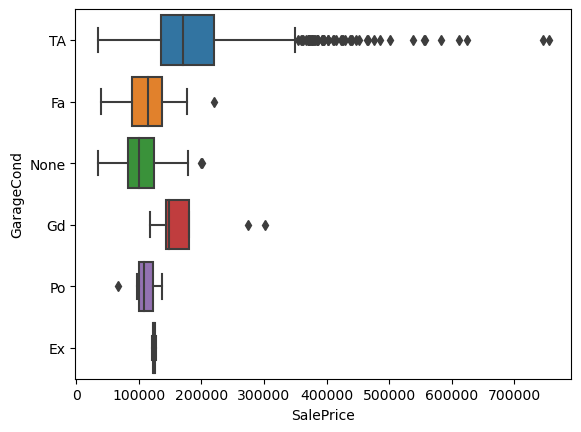

price vs  PavedDrive


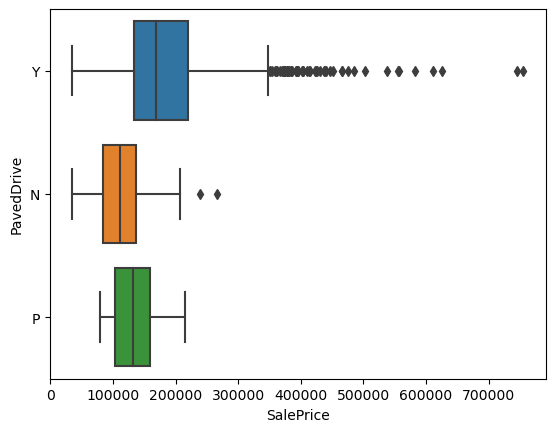

price vs  WoodDeckSF


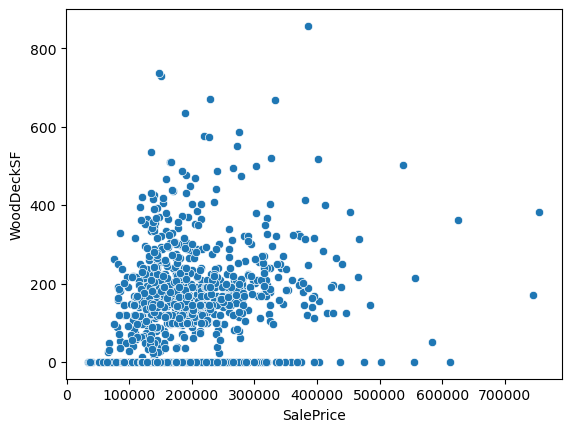

price vs  OpenPorchSF


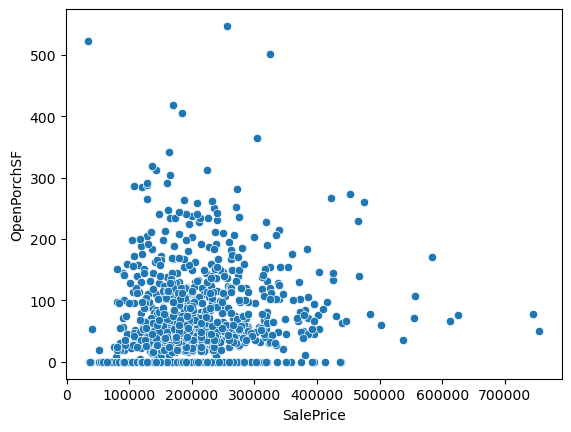

price vs  EnclosedPorch


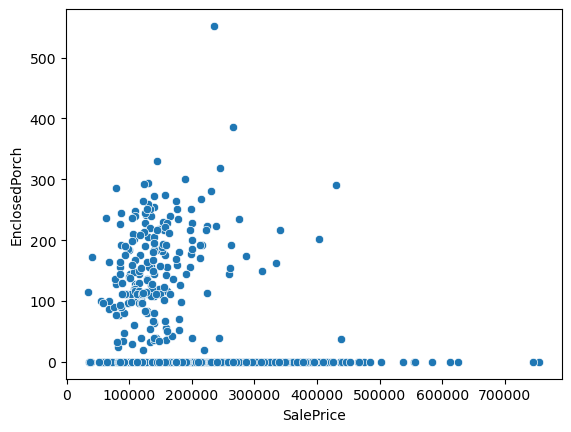

price vs  3SsnPorch


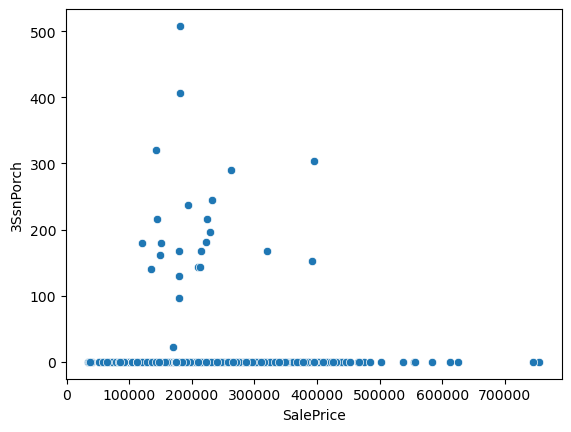

price vs  ScreenPorch


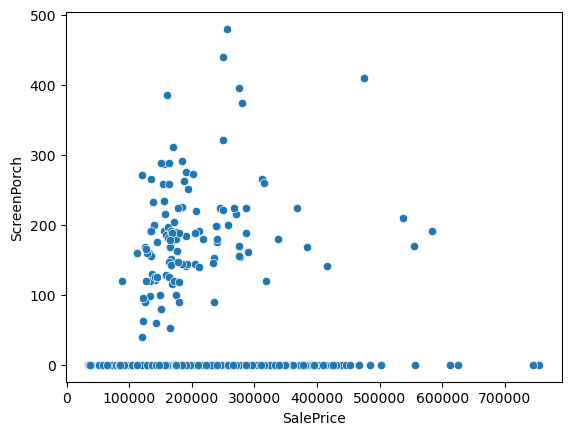

price vs  PoolArea


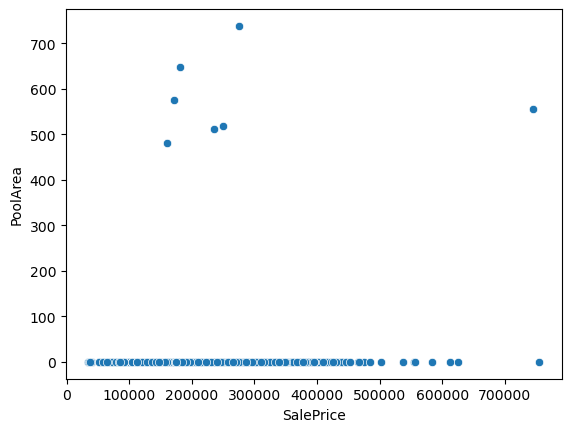

price vs  MiscVal


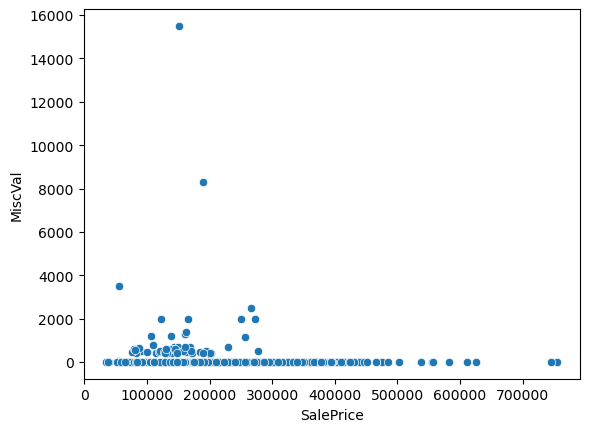

price vs  MoSold


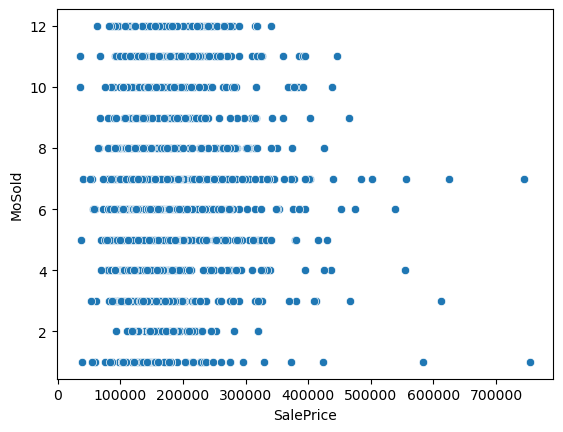

price vs  YrSold


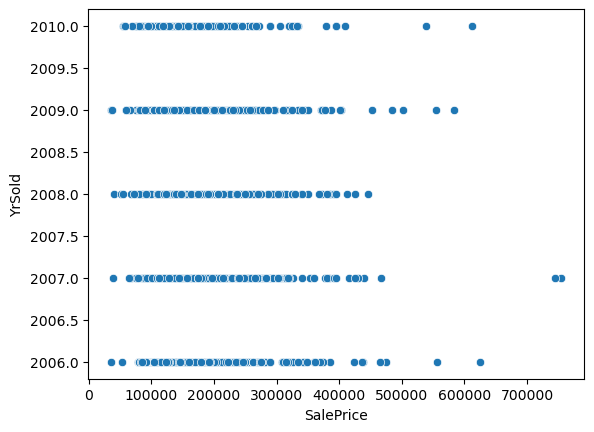

price vs  SaleType


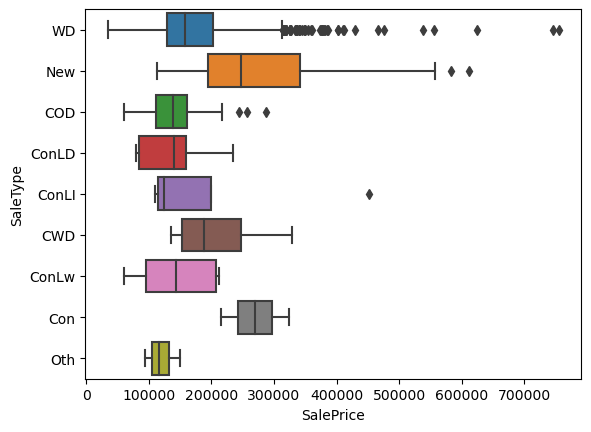

price vs  SaleCondition


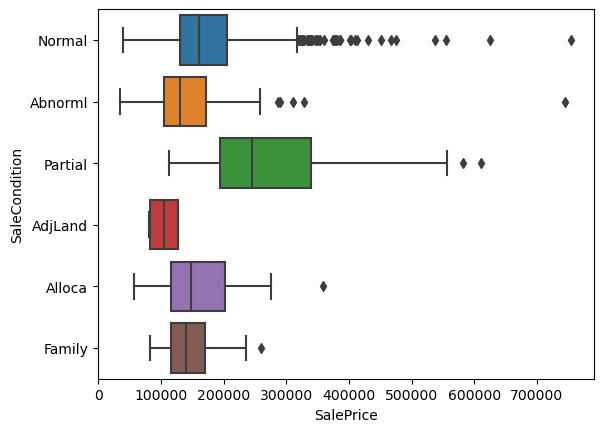

price vs  SalePrice


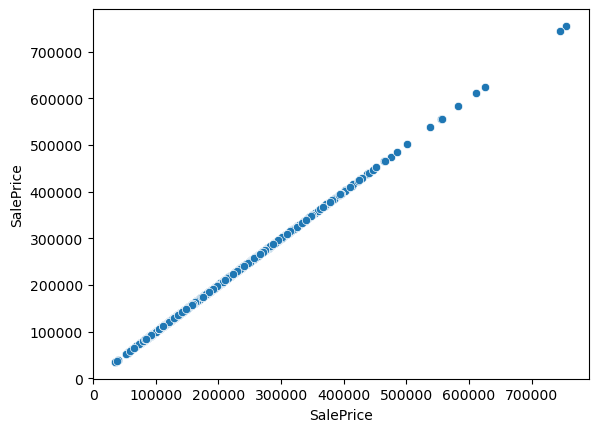

In [39]:
from matplotlib.pyplot import show
for i in df1.columns:
    if df1[i].dtypes==object:
        sns.boxplot(data=df1,x='SalePrice',y=i)
        print('price vs ',i)
        show()
    else:
        sns.scatterplot(data=df1,x='SalePrice',y=i)
        print('price vs ',i)
        show()

### Separating Input and Output Features

In [40]:
X = df1.drop(labels=['SalePrice'],axis=1)
Y = df1[['SalePrice']]

### Separate Categorical and Continuous Columns of Input Features 

In [41]:
cat=[]
con=[]
for i in X.columns:
    if X[i].dtypes==object:
        cat.append(i)
    else:
        con.append(i)

In [42]:
print('Cat columns:', cat)
print('Con columns:', con)

Cat columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Con columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPo

In [43]:
Xcon=X[con]

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
se = StandardScaler()

In [46]:
Xcon= pd.DataFrame(se.fit_transform(X[con]),columns= con)

In [47]:
Xcon

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.073732,-0.229183,-0.207125,0.650852,-0.517424,1.051899,0.879449,0.513594,0.574748,-0.288760,...,0.350660,-0.751887,0.215983,-0.359464,-0.11638,-0.270308,-0.068715,-0.087718,-1.599030,0.138826
1,-0.871979,0.451896,-0.091909,-0.072372,2.178727,0.157540,-0.428864,-0.571009,1.171304,-0.288760,...,-0.060947,1.625670,-0.704845,-0.359464,-0.11638,-0.270308,-0.068715,-0.087718,-0.489318,-0.614137
2,0.073732,-0.092967,0.073401,0.650852,-0.517424,0.985650,0.830993,0.325449,0.092239,-0.288760,...,0.631301,-0.751887,-0.070832,-0.359464,-0.11638,-0.270308,-0.068715,-0.087718,0.990298,0.138826
3,0.310159,-0.456209,-0.096918,0.650852,-0.517424,-1.863050,-0.719600,-0.571009,-0.499931,-0.288760,...,0.790331,-0.751887,-0.176501,4.091057,-0.11638,-0.270308,-0.068715,-0.087718,-1.599030,-1.367100
4,0.073732,0.633517,0.374967,1.374077,-0.517424,0.952526,0.734081,1.365783,0.462893,-0.288760,...,1.697737,0.779962,0.563180,-0.359464,-0.11638,-0.270308,-0.068715,-0.087718,2.100010,0.138826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.073732,-0.365399,-0.260525,-0.072372,-0.517424,0.919401,0.734081,-0.571009,-0.973668,-0.288760,...,-0.060947,-0.751887,-0.101023,-0.359464,-0.11638,-0.270308,-0.068715,-0.087718,0.620394,-0.614137
1455,-0.871979,0.678922,0.266263,-0.072372,0.381293,0.223789,0.152608,0.087500,0.758978,0.721688,...,0.126147,2.032568,-0.704845,-0.359464,-0.11638,-0.270308,-0.068715,-0.087718,-1.599030,1.644752
1456,0.310159,-0.183778,-0.147814,0.650852,3.077444,-1.001815,1.024817,-0.571009,-0.370531,-0.288760,...,-1.033835,-0.751887,0.200888,-0.359464,-0.11638,-0.270308,-0.068715,4.951368,-0.489318,1.644752
1457,-0.871979,-0.092967,-0.080187,-0.795596,0.381293,-0.703695,0.540256,-0.571009,-0.866200,6.090077,...,-1.089963,2.168200,-0.704845,1.473103,-0.11638,-0.270308,-0.068715,-0.087718,-0.859222,1.644752


### Outliers Treatment

In [48]:
out= []

for i in Xcon.columns:
    ol= Xcon[(Xcon[i]>3)|(Xcon[i]<-3)].index
    out.extend(ol)

In [49]:
out

[9,
 48,
 93,
 125,
 165,
 246,
 291,
 300,
 312,
 335,
 411,
 488,
 520,
 535,
 635,
 637,
 703,
 705,
 713,
 861,
 969,
 985,
 1030,
 1062,
 1144,
 1186,
 1190,
 1266,
 1392,
 1415,
 171,
 197,
 231,
 277,
 313,
 446,
 807,
 909,
 934,
 1107,
 1127,
 1173,
 1182,
 1211,
 1298,
 1337,
 53,
 249,
 313,
 335,
 384,
 451,
 457,
 661,
 706,
 769,
 848,
 1298,
 1395,
 375,
 533,
 88,
 185,
 191,
 218,
 241,
 250,
 304,
 375,
 378,
 398,
 461,
 508,
 519,
 583,
 676,
 703,
 726,
 745,
 980,
 991,
 1123,
 1149,
 1213,
 1268,
 1327,
 1352,
 1434,
 1456,
 304,
 630,
 747,
 1132,
 1137,
 1349,
 37,
 58,
 70,
 105,
 115,
 161,
 169,
 178,
 224,
 297,
 349,
 403,
 477,
 517,
 523,
 654,
 691,
 718,
 755,
 763,
 798,
 808,
 825,
 898,
 981,
 1111,
 1169,
 1228,
 1289,
 1298,
 1373,
 1416,
 70,
 178,
 523,
 898,
 1182,
 1298,
 24,
 52,
 113,
 116,
 153,
 166,
 233,
 253,
 260,
 263,
 271,
 273,
 313,
 322,
 355,
 414,
 440,
 446,
 470,
 493,
 542,
 548,
 577,
 586,
 599,
 666,
 697,
 764,
 785,
 82

In [50]:
outliers= list(set(out))
outliers

[1,
 3,
 5,
 7,
 8,
 9,
 17,
 24,
 26,
 28,
 33,
 37,
 39,
 41,
 46,
 48,
 50,
 51,
 52,
 53,
 55,
 58,
 64,
 70,
 72,
 74,
 78,
 80,
 88,
 89,
 93,
 99,
 102,
 104,
 105,
 108,
 113,
 115,
 116,
 118,
 120,
 125,
 127,
 129,
 137,
 140,
 144,
 148,
 153,
 154,
 155,
 159,
 161,
 163,
 165,
 166,
 169,
 170,
 171,
 176,
 178,
 182,
 185,
 187,
 188,
 189,
 191,
 196,
 197,
 198,
 201,
 205,
 210,
 213,
 215,
 218,
 224,
 231,
 233,
 237,
 241,
 245,
 246,
 249,
 250,
 251,
 253,
 258,
 260,
 263,
 267,
 271,
 273,
 277,
 278,
 280,
 287,
 289,
 291,
 293,
 297,
 298,
 299,
 300,
 304,
 306,
 307,
 309,
 312,
 313,
 314,
 322,
 325,
 326,
 328,
 330,
 332,
 335,
 339,
 342,
 343,
 346,
 349,
 351,
 352,
 355,
 357,
 358,
 359,
 360,
 365,
 366,
 367,
 375,
 378,
 380,
 384,
 386,
 393,
 398,
 400,
 403,
 406,
 411,
 414,
 420,
 421,
 426,
 431,
 434,
 440,
 441,
 446,
 451,
 454,
 457,
 459,
 461,
 462,
 464,
 470,
 471,
 475,
 477,
 480,
 488,
 493,
 495,
 496,
 499,
 504,
 505,
 508,


In [51]:
X= X.drop(index= outliers,axis=0)
Y= Y.drop(index= outliers,axis=0)

In [52]:
print(X.shape)
print(Y.shape)

(974, 75)
(974, 1)


In [53]:
X.index= range(0,974)
Y.index= range(0,974)

### Preprocessing

In [54]:
Xcat= X[cat]
Xcon= X[con]

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le=LabelEncoder()

In [57]:
for i in Xcat.columns:
    Xcat[i]=le.fit_transform(Xcat[i])

C:\Users\Nikhil Kumar\AppData\Local\Temp\ipykernel_456\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xcat[i]=le.fit_transform(Xcat[i])
C:\Users\Nikhil Kumar\AppData\Local\Temp\ipykernel_456\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xcat[i]=le.fit_transform(Xcat[i])
C:\Users\Nikhil Kumar\AppData\Local\Temp\ipykernel_456\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [58]:
Xcat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,1,...,2,4,3,0,2,5,5,2,8,4
1,3,1,0,3,0,4,0,5,2,1,...,2,4,5,0,2,5,5,2,8,4
2,3,1,0,3,0,2,0,15,2,1,...,2,4,5,0,2,5,5,2,8,4
3,3,1,3,3,0,4,0,21,2,1,...,2,4,2,0,2,5,5,2,8,4
4,3,1,3,3,0,4,0,19,2,1,...,3,4,3,4,3,5,5,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,3,1,3,3,0,4,0,21,2,1,...,0,4,2,0,0,5,5,2,6,5
970,3,1,3,3,0,4,0,11,2,1,...,3,4,3,5,1,3,3,2,8,0
971,1,1,3,3,0,4,0,21,2,1,...,2,4,3,0,2,5,5,2,8,4
972,3,1,3,3,0,4,0,8,2,1,...,3,4,5,0,2,5,5,2,8,4


In [59]:
Xcon=pd.DataFrame(se.fit_transform(Xcon),columns=con)

In [60]:
Xcon

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.148314,-0.175337,-0.219123,0.646749,-0.532845,0.938347,0.804722,0.828878,0.690605,-0.253510,...,0.345466,-0.818607,0.322916,-0.337936,-0.034388,-0.21502,-0.032059,-0.145974,-1.608740,0.140144
1,0.148314,-0.010186,0.489018,0.646749,-0.532845,0.868098,0.756057,0.572349,0.154905,-0.253510,...,0.684858,-0.818607,-0.028607,-0.337936,-0.034388,-0.21502,-0.032059,-0.145974,1.019678,0.140144
2,0.148314,0.870621,1.250269,1.418726,-0.532845,0.832973,0.658726,1.990804,0.566420,-0.253510,...,1.974547,0.918461,0.748442,-0.337936,-0.034388,-0.21502,-0.032059,-0.145974,2.146143,0.140144
3,-0.854866,0.375167,0.194128,1.418726,-0.532845,0.973472,0.902052,0.753429,2.305011,-0.253510,...,0.843241,1.488437,0.248911,-0.337936,-0.034388,-0.21502,-0.032059,-0.145974,0.644190,-0.605761
4,-0.854866,0.099915,0.476373,-0.897205,-0.532845,-0.396399,-1.044549,-0.649937,1.177605,-0.253510,...,-0.582204,-0.818607,-0.805655,-0.337936,-0.034388,-0.21502,-0.032059,-0.145974,-1.608740,0.140144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,-0.854866,0.540318,-0.013762,1.418726,-0.532845,1.113972,1.096712,0.813788,-1.028505,-0.253510,...,1.997173,-0.818607,-0.139613,-0.337936,-0.034388,-0.21502,-0.032059,-0.145974,-0.482275,0.886050
970,-0.854866,1.200923,1.998116,-0.897205,-0.532845,1.043722,0.950717,-0.649937,-1.028505,-0.253510,...,-2.754312,-0.492907,0.230410,-0.337936,-0.034388,-0.21502,-0.032059,-0.145974,0.268702,-1.351667
971,-0.854866,-0.340488,-0.459385,0.646749,-0.532845,0.973472,0.902052,-0.649937,-0.030155,-0.253510,...,-0.491700,-0.818607,1.284976,-0.337936,-0.034388,-0.21502,-0.032059,-0.145974,1.395166,0.886050
972,0.148314,-0.340488,-0.353922,-0.125228,-0.532845,0.797848,0.658726,-0.649937,-1.028505,-0.253510,...,-0.152308,-0.818607,-0.065609,-0.337936,-0.034388,-0.21502,-0.032059,-0.145974,0.644190,-0.605761


In [61]:
X= Xcon.join(Xcat)

In [62]:
X.shape

(974, 75)

In [63]:
Y.shape

(974, 1)

### splitting data into training and testing

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

### feature selection- Backward Elimination

In [66]:
from statsmodels.api import add_constant,OLS
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     94.63
Date:                Wed, 01 May 2024   Prob (F-statistic):          7.54e-314
Time:                        17:13:04   Log-Likelihood:                -8845.4
No. Observations:                 779   AIC:                         1.783e+04
Df Residuals:                     707   BIC:                         1.817e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass    -6642.1835   2857.308     -2.325      0.020   -1.23e+04   -1032.359
LotFrontage    1115.2794   1147.909      0.972      0.332   -1138.438    3368.997
LotArea        3406.6998   1147.368      2.969      0.003    1154.043    5659.357
OverallQual    1.273e+04   1559.023      8.166      0.000    9669.450    1.58e+04
OverallCond    5638.0449   1086.744      5.188      0.000    3504.413    7771.677
YearBuilt      4697.6912   2368.647      1.983      0.048      47.266    9348.116
YearRemodAdd    612.6173   1417.611      0.432      0.666   -2170.613    3395.848
MasVnrArea     1480.2281    998.627      1.482      0.139    -480.401    3440.858
BsmtFinSF1     7892.1412   1015.400      7.772      0.000    5898.581    9885.701
BsmtFinSF2     -228.9225   1179.878     -0.194      0.846   -2545.407    2087.562
BsmtUnfSF      -449.3322    881.333     -0.510      0.610   -2179.675    1281.011
TotalBsmtSF    8265.6119   1382.222      5.980      0.000    5551.862     1.1e+04
1stFlrSF       4315.5390   1505.124      2.867      0.004    1360.490    7270.587
2ndFlrSF       1.042e+04   1226.966      8.496      0.000    8015.642    1.28e+04
LowQualFinSF  -1347.3523    755.074     -1.784      0.075   -2829.807     135.102
GrLivArea      1.324e+04   1340.975      9.872      0.000    1.06e+04    1.59e+04
BsmtFullBath    269.3012   1210.484      0.222      0.824   -2107.273    2645.875
BsmtHalfBath    324.0760    730.510      0.444      0.657   -1110.152    1758.304
FullBath       -816.7191   1505.173     -0.543      0.588   -3771.862    2138.424
HalfBath      -1654.8265   1293.691     -1.279      0.201   -4194.762     885.109
BedroomAbvGr  -2933.7667   1303.017     -2.252      0.025   -5492.013    -375.520
KitchenAbvGr   -638.4843    846.180     -0.755      0.451   -2299.811    1022.843
TotRmsAbvGrd   4687.7290   1664.870      2.816      0.005    1419.047    7956.411
Fireplaces     2651.2452    990.316      2.677      0.008     706.933    4595.557
GarageYrBlt    -806.8614   1019.691     -0.791      0.429   -2808.845    1195.123
GarageCars     1546.0525   1849.877      0.836      0.404   -2085.858    5177.963
GarageArea     4477.0396   1660.738      2.696      0.007    1216.472    7737.607
WoodDeckSF     2433.9307    857.108      2.840      0.005     751.149    4116.713
OpenPorchSF    2082.7590    944.500      2.205      0.028     228.399    3937.119
EnclosedPorch   303.5275    915.143      0.332      0.740   -1493.196    2100.251
3SsnPorch      1458.2319    720.187      2.025      0.043      44.271    2872.193
ScreenPorch     879.8923    816.465      1.078      0.282    -723.094    2482.879
PoolArea      -3.239e+06   1.04e+06     -3.103      0.002   -5.29e+06   -1.19e+06
MiscVal        -818.7569    900.153     -0.910      0.363   -2586.051     948.537
MoSold         1394.8523    836.154      1.668   

In [67]:
model.pvalues.sort_values()

GrLivArea       1.279005e-21
2ndFlrSF        1.154835e-16
OverallQual     1.469252e-15
BsmtFinSF1      2.719632e-14
TotalBsmtSF     3.542423e-09
                    ...     
BsmtFinSF2      8.462143e-01
Electrical      8.554008e-01
Neighborhood    9.336365e-01
GarageFinish    9.341398e-01
BsmtFinType2    9.822798e-01
Length: 75, dtype: float64

In [68]:
c=model.pvalues.sort_values().index[-1]
c

'BsmtFinType2'

In [69]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

Neighborhood
0.895


In [70]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

GarageFinish
0.896


In [71]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

Electrical
0.896


In [72]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

BsmtFullBath
0.896


In [73]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

BsmtFinSF2
0.896


In [74]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

BsmtUnfSF
0.896


In [75]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

RoofMatl
0.896


In [76]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

EnclosedPorch
0.896


In [77]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

LandSlope
0.896


In [78]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

CentralAir
0.896


In [79]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

Heating
0.897


In [80]:

c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

YearRemodAdd
0.897


In [81]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

BsmtFinType1
0.897


In [82]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

BsmtHalfBath
0.897


In [83]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

Condition1
0.897


In [84]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

PavedDrive
0.897


In [85]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

FullBath
0.897


In [86]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

GarageQual
0.897


In [87]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

GarageCars
0.897


In [88]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

KitchenAbvGr
0.898


In [89]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

GarageYrBlt
0.898


In [90]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

MiscVal
0.898


In [91]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

Condition2
0.898


In [92]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

HalfBath
0.898


In [93]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

BsmtCond
0.898


In [94]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

LandContour
0.898


In [95]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

LotShape
0.898


In [96]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

YrSold
0.898


In [97]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

LotFrontage
0.898


In [98]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

LotConfig
0.898


In [99]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

ScreenPorch
0.898


In [100]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

MSZoning
0.898


In [101]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

Exterior2nd
0.898


In [102]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

RoofStyle
0.897


In [103]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

HouseStyle
0.897


In [104]:
c=model.pvalues.sort_values().index[-1]
X=X.drop(labels=c,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
score=round(model.rsquared_adj,3)
c=model.pvalues.sort_values().index[-1]
print(c)
print(score)

BldgType
0.897


In [105]:
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch',
       'PoolArea', 'MoSold', 'Street', 'Utilities', 'BldgType', 'Exterior1st',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageCond', 'SaleType', 'SaleCondition'],
      dtype='object')

In [106]:
# final model building

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
lr=LinearRegression()

In [109]:
model=lr.fit(xtrain,ytrain)

In [110]:
# predictions

In [111]:
tr_pred=model.predict(xtrain)

In [112]:
ts_pred=model.predict(xtest)

In [113]:
# model evaluation

In [114]:
from sklearn.metrics import r2_score,mean_absolute_error

In [115]:
tr_score=r2_score(ytrain, tr_pred)
ts_score=r2_score(ytest, ts_pred)
print(tr_score)
print(ts_score)

0.9020009538751553
0.9017331281314882


In [116]:
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
print(tr_err)
print(ts_err)

14584.428312216136
15544.418173864527


In [117]:
# training error low so overfitting

In [118]:
from sklearn.linear_model import Ridge

In [119]:
rr=Ridge(alpha=0.5)

In [120]:
model=rr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

In [121]:
tr_score=r2_score(ytrain, tr_pred)
ts_score=r2_score(ytest, ts_pred)
print(tr_score)
print(ts_score)

0.9018830528274258
0.9013477507175024


In [122]:
# cross validation

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
import numpy as np

In [125]:
params={'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],'random_state':np.arange(1,40)}

In [126]:
cv=GridSearchCV(rr,params,scoring='neg_mean_squared_error',cv=4)

In [127]:
cvmodel=cv.fit(X,Y)

In [128]:
cvmodel.best_params_

{'alpha': 0.9, 'random_state': 1}

In [129]:
rr=Ridge(alpha=0.9)
model=rr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
tr_error=mean_absolute_error(ytrain, tr_pred)
ts_error=mean_absolute_error(ytest, ts_pred)
print(tr_error)
print(ts_error)

14613.767625640901
15566.030978323495


In [130]:
tr_score=r2_score(ytrain, tr_pred)
ts_score=r2_score(ytest, ts_pred)
print(tr_score)
print(ts_score)

0.9017682929817208
0.9011932910988392


In [131]:
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch',
       'PoolArea', 'MoSold', 'Street', 'Utilities', 'BldgType', 'Exterior1st',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageCond', 'SaleType', 'SaleCondition'],
      dtype='object')

In [132]:
# import prediction file(already imported)

In [133]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [134]:
df2= df2.drop('Id',axis=1)

In [135]:
100*df2.isna().sum()/len(df2)

MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
Street            0.000000
                   ...    
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.068540
SaleCondition     0.000000
Length: 79, dtype: float64

In [136]:
percent_nan = percent_missing(df2)

In [137]:
percent_nan

TotalBsmtSF      0.068540
GarageArea       0.068540
GarageCars       0.068540
KitchenQual      0.068540
BsmtUnfSF        0.068540
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
SaleType         0.068540
Exterior1st      0.068540
Exterior2nd      0.068540
Functional       0.137080
Utilities        0.137080
BsmtHalfBath     0.137080
BsmtFullBath     0.137080
MSZoning         0.274160
MasVnrArea       1.028101
BsmtFinType1     2.878684
BsmtFinType2     2.878684
BsmtQual         3.015764
BsmtExposure     3.015764
BsmtCond         3.084304
GarageType       5.209047
GarageCond       5.346127
GarageQual       5.346127
GarageYrBlt      5.346127
GarageFinish     5.346127
LotFrontage     15.558602
FireplaceQu     50.034270
MasVnrType      61.274846
Fence           80.123372
Alley           92.666210
MiscFeature     96.504455
PoolQC          99.794380
dtype: float64

(0.0, 1.0)

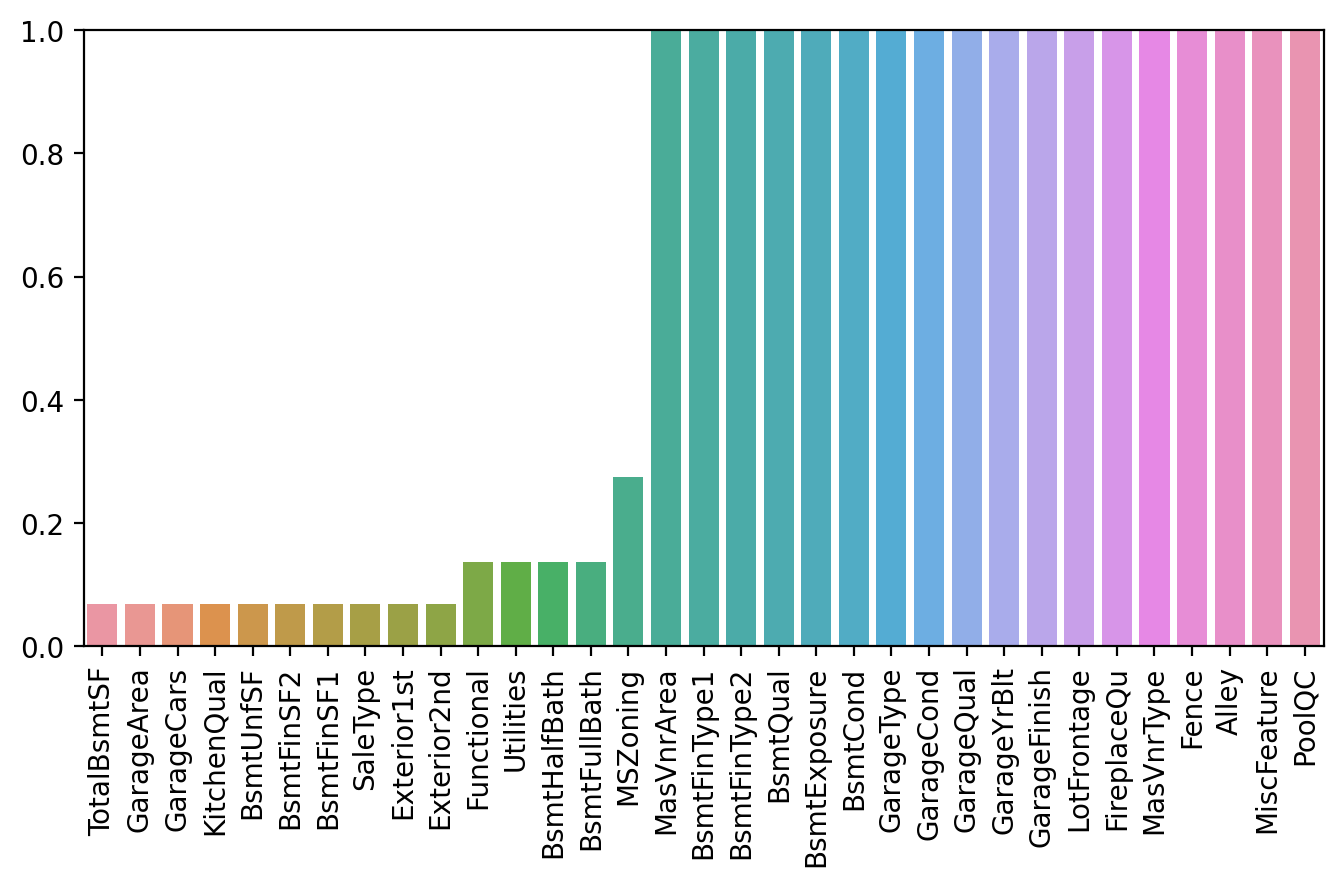

In [138]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [139]:
percent_nan[percent_nan < 1]

TotalBsmtSF     0.06854
GarageArea      0.06854
GarageCars      0.06854
KitchenQual     0.06854
BsmtUnfSF       0.06854
BsmtFinSF2      0.06854
BsmtFinSF1      0.06854
SaleType        0.06854
Exterior1st     0.06854
Exterior2nd     0.06854
Functional      0.13708
Utilities       0.13708
BsmtHalfBath    0.13708
BsmtFullBath    0.13708
MSZoning        0.27416
dtype: float64

In [140]:
100/len(df2)

0.06854009595613433

In [141]:
df2[df2['TotalBsmtSF'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


In [142]:
df2 = df2.dropna(axis = 0, subset = ['TotalBsmtSF']) 

In [143]:
percent_nan = percent_missing(df2)
percent_nan

BsmtHalfBath     0.068587
GarageArea       0.068587
GarageCars       0.068587
KitchenQual      0.068587
BsmtFullBath     0.068587
SaleType         0.068587
Exterior1st      0.068587
Exterior2nd      0.068587
Utilities        0.137174
Functional       0.137174
MSZoning         0.274348
MasVnrArea       1.028807
BsmtFinType1     2.812071
BsmtFinType2     2.812071
BsmtQual         2.949246
BsmtExposure     2.949246
BsmtCond         3.017833
GarageType       5.212620
GarageFinish     5.349794
GarageCond       5.349794
GarageQual       5.349794
GarageYrBlt      5.349794
LotFrontage     15.569273
FireplaceQu     50.000000
MasVnrType      61.248285
Fence           80.178326
Alley           92.661180
MiscFeature     96.502058
PoolQC          99.794239
dtype: float64

In [144]:
df2.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [145]:
bsmt_num_cols = ['BsmtFullBath', 'BsmtHalfBath']
df2[bsmt_num_cols] = df2[bsmt_num_cols].fillna(0)       

bsmt_cat_cols= ['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2']         
df2[bsmt_cat_cols]= df2[bsmt_cat_cols].fillna('None')   


In [146]:
percent_nan = percent_missing(df2)
percent_nan

SaleType         0.068587
GarageArea       0.068587
GarageCars       0.068587
Exterior1st      0.068587
Exterior2nd      0.068587
KitchenQual      0.068587
Utilities        0.137174
Functional       0.137174
MSZoning         0.274348
MasVnrArea       1.028807
BsmtExposure     2.949246
GarageType       5.212620
GarageYrBlt      5.349794
GarageFinish     5.349794
GarageQual       5.349794
GarageCond       5.349794
LotFrontage     15.569273
FireplaceQu     50.000000
MasVnrType      61.248285
Fence           80.178326
Alley           92.661180
MiscFeature     96.502058
PoolQC          99.794239
dtype: float64

In [147]:
gar_cat_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df2[gar_cat_cols] = df2[gar_cat_cols].fillna('None')
gar_num_cols = ['GarageArea', 'GarageCars','GarageYrBlt']
df2[gar_num_cols] = df2[gar_num_cols].fillna(0)

In [148]:
percent_nan = percent_missing(df2)
percent_nan

Exterior1st      0.068587
Exterior2nd      0.068587
KitchenQual      0.068587
SaleType         0.068587
Utilities        0.137174
Functional       0.137174
MSZoning         0.274348
MasVnrArea       1.028807
BsmtExposure     2.949246
LotFrontage     15.569273
FireplaceQu     50.000000
MasVnrType      61.248285
Fence           80.178326
Alley           92.661180
MiscFeature     96.502058
PoolQC          99.794239
dtype: float64

In [149]:
df2= df2.drop(['Fence', 'Alley', 'MiscFeature', 'PoolQC'],axis=1)

In [150]:
percent_nan = percent_missing(df2)
percent_nan

Exterior1st      0.068587
Exterior2nd      0.068587
KitchenQual      0.068587
SaleType         0.068587
Utilities        0.137174
Functional       0.137174
MSZoning         0.274348
MasVnrArea       1.028807
BsmtExposure     2.949246
LotFrontage     15.569273
FireplaceQu     50.000000
MasVnrType      61.248285
dtype: float64

In [151]:
df2['MasVnrType']= df2['MasVnrType'].fillna('None')

In [152]:
df2['MasVnrArea']= df2['MasVnrArea'].fillna(0)

In [153]:
df2['FireplaceQu']= df2['FireplaceQu'].fillna('None')

In [154]:
df2['BsmtExposure']= df2['BsmtExposure'].fillna('No')

In [155]:
percent_nan = percent_missing(df2)
percent_nan

Exterior1st     0.068587
Exterior2nd     0.068587
KitchenQual     0.068587
SaleType        0.068587
Utilities       0.137174
Functional      0.137174
MSZoning        0.274348
LotFrontage    15.569273
dtype: float64

In [156]:
df2 = df2.dropna(axis = 0, subset = ['Exterior1st','Exterior2nd','KitchenQual','SaleType','Utilities','Functional','MSZoning'])      
     
   

In [157]:
percent_nan = percent_missing(df2)
percent_nan

LotFrontage    15.52795
dtype: float64

In [158]:
df2['LotFrontage']= df2['LotFrontage'].fillna(df2['LotFrontage'].mean())

In [159]:
percent_nan = percent_missing(df2)
percent_nan

Series([], dtype: float64)

In [160]:
df2.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

In [161]:
df2.shape

(1449, 75)

In [162]:
# Preprocessing

In [163]:
cat=[]
con=[]
for i in df2.columns:
    if df2[i].dtypes==object:
        cat.append(i)
    else:
        con.append(i)

In [164]:
Xcat=df2[cat]
Xcon=df2[con]

In [165]:
Xcon=pd.DataFrame(se.fit_transform(Xcon),columns=con)

In [166]:
for i in Xcat.columns:
    Xcat[i]=le.fit_transform(Xcat[i])

C:\Users\Nikhil Kumar\AppData\Local\Temp\ipykernel_456\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xcat[i]=le.fit_transform(Xcat[i])
C:\Users\Nikhil Kumar\AppData\Local\Temp\ipykernel_456\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xcat[i]=le.fit_transform(Xcat[i])
C:\Users\Nikhil Kumar\AppData\Local\Temp\ipykernel_456\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [167]:
Xn=Xcon.join(Xcat)

In [168]:
Xn

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-0.877080,0.563257,0.398418,-0.769981,0.397439,-0.350759,-1.084543,-0.564847,0.059127,0.521123,...,3.0,6.0,3.0,1.0,3.0,4.0,5.0,2.0,8.0,4.0
1,-0.877080,0.612000,0.957798,-0.066512,0.397439,-0.449858,-1.227126,0.044414,1.058729,-0.297606,...,2.0,6.0,3.0,1.0,3.0,4.0,5.0,2.0,8.0,4.0
2,0.057311,0.270796,0.865379,-0.769981,-0.516671,0.838438,0.673981,-0.564847,0.768735,-0.297606,...,3.0,6.0,5.0,1.0,0.0,4.0,5.0,2.0,8.0,4.0
3,0.057311,0.465770,0.050735,-0.066512,0.397439,0.871471,0.673981,-0.452021,0.353516,-0.297606,...,2.0,6.0,2.0,1.0,0.0,4.0,5.0,2.0,8.0,4.0
4,1.458899,-1.240248,-1.000984,1.340427,-0.516671,0.673272,0.388815,-0.564847,-0.391242,-0.297606,...,2.0,6.0,3.0,1.0,2.0,4.0,5.0,2.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,2.393290,-2.312602,-1.650034,-1.473450,1.311550,-0.053460,-0.656794,-0.564847,-0.969034,-0.297606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1445,2.393290,-2.312602,-1.658917,-1.473450,-0.516671,-0.053460,-0.656794,-0.564847,-0.415409,-0.297606,...,3.0,6.0,3.0,1.0,0.0,4.0,5.0,2.0,8.0,4.0
1446,-0.877080,4.462726,2.170247,-0.769981,1.311550,-0.383792,0.578926,-0.564847,1.720004,-0.297606,...,3.0,6.0,5.0,3.0,2.0,4.0,5.0,2.0,8.0,4.0
1447,0.641306,-0.314124,0.148653,-0.769981,-0.516671,0.673272,0.388815,-0.564847,-0.228670,-0.297606,...,3.0,6.0,3.0,1.0,2.0,4.0,5.0,2.0,8.0,4.0


In [169]:
z=X.columns

In [170]:
q=Xn.columns

In [171]:
s=[]
for i in q:
    if i not in z:
        s.append(i)

In [172]:
s

['LotFrontage',
 'YearRemodAdd',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'GarageYrBlt',
 'GarageCars',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'YrSold',
 'MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior2nd',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageFinish',
 'GarageQual',
 'PavedDrive']

In [173]:
Xn=Xn.drop(labels=s,axis=1)

In [174]:
# final predictions

In [175]:
Xn.isna().sum()

MSSubClass        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
MasVnrArea        0
BsmtFinSF1        0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BedroomAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
3SsnPorch         0
PoolArea          0
MoSold            0
Street           10
Utilities        10
BldgType         10
Exterior1st      10
MasVnrType       10
ExterQual        10
ExterCond        10
Foundation       10
BsmtQual         10
BsmtExposure     10
HeatingQC        10
KitchenQual      10
Functional       10
FireplaceQu      10
GarageType       10
GarageCond       10
SaleType         10
SaleCondition    10
dtype: int64

In [176]:
Xn = Xn.dropna(axis = 0, subset = ['BldgType']) 

In [177]:
Xn.isna().sum()

MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
MasVnrArea       0
BsmtFinSF1       0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BedroomAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
3SsnPorch        0
PoolArea         0
MoSold           0
Street           0
Utilities        0
BldgType         0
Exterior1st      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtExposure     0
HeatingQC        0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageCond       0
SaleType         0
SaleCondition    0
dtype: int64

In [178]:
new_preds=model.predict(Xn)

In [179]:
Xn['SalePrice']= new_preds

In [180]:
Xn['SalePrice']

0       147540.025733
1       189018.503025
2       200778.588170
3       214102.644134
4       209552.487154
            ...      
1443    146845.209483
1445    109093.381158
1446    228081.166290
1447    127440.992358
1448    242566.995060
Name: SalePrice, Length: 1439, dtype: float64

In [181]:
print(Xn.shape)

(1439, 40)


In [182]:
Xn.index= range(0,1439)

In [183]:
s=[]
for i in range(1461,2900,1):
    s.append(i)
print(s)

[1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 162

In [184]:
Xn['Id']=s

In [185]:
Xn[['Id','SalePrice']]

,Id,SalePrice
0,1461,147540.025733
1,1462,189018.503025
2,1463,200778.588170
3,1464,214102.644134
4,1465,209552.487154
...,...,...
1434,2895,146845.209483
1435,2896,109093.381158
1436,2897,228081.166290
1437,2898,127440.992358


In [186]:
Xn[0:10][['Id','SalePrice']]

,Id,SalePrice
0,1461,147540.025733
1,1462,189018.503025
2,1463,200778.588170
3,1464,214102.644134
4,1465,209552.487154
5,1466,198535.886880
6,1467,200977.340990
7,1468,184891.890844
8,1469,220868.516314
9,1470,132954.806150
